<a href="https://colab.research.google.com/github/esteban3622/M3_Actividad_Final_U_Andes/blob/main/M3_Actividad_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desarrollo de la actividad: Esteban Ricardo Higuera Villalba

![alt text](https://uniandes.edu.co/sites/default/files/logo-uniandes.png "Universidad de los Andes")

# Actividad final Módulo 3

Esta actividad estará enfocada en el análisis de regresión. Trabajaremos con el conjunto de datos: "cancer_reg.csv". El objetivo del análisis será encontrar las variables que pueden ayudarnos a predecir la tasa de mortalidad.

El trabajo se realizará de forma individual y se dispondrá del espacio de la clase 16 del módulo 3 (tres horas) para avanzar. Durante la clase se trabajará en grupos de 4 personas en salas privadas de grupos pequeños.

# Habilidades Intermedias para Analistas de Datos

## Módulo 3 - Modelos lineales aplicados en negocios en Python

In [ ]:
# Clonar repositorio desde GitHub
! git clone https://github.com/esteban3622/M3_Actividad_Final_U_Andes.git

Cloning into 'M3_Actividad_Final_U_Andes'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 297.90 KiB | 4.14 MiB/s, done.


Para ver la importancia de entender el comportamiento de los datos, detectar patrones y analizar tendencias, es de gran utilidad conocer y saber usar la regresión lineal.

## Objetivos

En el siguiente ejercicio vamos a poner a prueba todo lo visto en el módulo 3.<br>
Para esto se va a importar una base de datos que contiene información real de casos y datos relacionados al tratamiento y análisis del cancer en Estados Unidos.<br>
Con esta tabla de datos vamos a tratar de predecir el promedio de muertes por cancer que podríamos esperar teniendo en cuenta la siguiente información:

### Diccionario de datos
|Nombre de la Variable|Descripción|
|---|---|
|avgAnnCount|Número de casos reportados anualmente|
|avgDeathsPerYear|Promedio de muertes reportadas por año|
|incidenceRate|Promedio de casos diagnosticados <i>per capita</i>|
|medIncome|Salario medio por condado|
|popEst2015|Población del condado|
|povertyPercent|Porcentaje de la población en condición de pobreza|
|studyPerCap|Pruebas médicas <i>per capita</i> relacionadas con al cancer|
|binnedInc|Salario medio agrupado por decíl|
|MedianAge|Edad media|
|MedianAgeMale|Edad media hombres|
|MedianAgeFemale|Edad media mujeres|
|Geography|Ubicación geográfica|
|AvgHouseholdSize|Tamaño promedio de la vivienda familiar|
|PercentMarried|Porcentaje matrimonio|
|PctNoHS18_24|Porcentaje de residentes entre 18 y 24 años con nivel educativo más avanzado: Inferior a bachiller|
|PctHS18_24|Porcentaje de residentes entre 18 y 24 años con nivel educativo más avanzado: Bachiller|
|PctSomeCol18_24|Porcentaje de residentes entre 18 y 24 años con nivel educativo más avanzado: Atendió a la universidad|
|PctBachDeg18_24|Porcentaje de residentes entre 18 y 24 años con nivel educativo más avanzado: Universidad terminada|
|PctHS25_Over|Porcentaje de residentes de 25 o más años con nivel educativo más avanzado: Bachiller|
|PctBachDeg25_Over|Porcentaje de residentes de 25 o más años con nivel educativo más avanzado: Universidad terminada|
|PctEmployed16_Over|Porcentaje de residentes de 16 o más años con empleo|
|PctUnemployed16_Over|Porcentaje de residentes de 16 o más años sin empleo|
|PctPrivateCoverage|Porcentaje de residentes con sistema de salud privada|
|PctPrivateCoverageAlone|Porcentaje de residentes con sistema de salud privada sin asistencia pública|
|PctEmpPrivCoverage|Porcentaje de residentes con sistema de salud privada provista por el empleador|
|PctPublicCoverage|Porcentaje de residentes con sistema de salud pública|
|PctPublicCoverageAlone|Porcentaje de residentes con sistema de salud pública sin asistencia pública|
|PctWhite|Porcentaje de la población que se identifica como caucásica|
|PctBlack|Porcentaje de la población que se identifica como afrodescendiente|
|PctAsian|Porcentaje de la población que se identifica como asiática|
|PctOtherRace|Porcentaje de la población que se identifica como otra raza|
|PctMarriedHouseholds|Porcentaje de hogares con familias casadas|
|BirthRate|Tasa de natalidad en relación con el número de mujeres|

La variable dependiente es `TARGET_deathRate` que es el promedio <i>per capita</i> de muertes por cancer.

### Objetivos específicos
<ul>
    <li>Realizar un análisis exploratorio de los datos</li>
    <li>Identificar y tratar datos atípicos</li>
    <li>Realizar análisis multivariados</li>
    <li>Revisar correlaciones entre variables independientes</li>
    <li>Generar modelos de regresión lineal</li>
    <li>Analizar modelos de regresión lineal</li>
    </ul>
    

## Librerías

Inicialmente importaremos pandas como librería principal, pero son libres de descargar otras librerías que consideren de utilidad para trabajar con los datos y cumplir con los objetvos.

In [ ]:
import pandas as pd
pd.set_option("display.max_columns", None)

## Importar datos

Los datos a utiliza contienen una codificación diferente, por lo que es necesario especificar cómo se deben leer los datos al momento de cargar el Dataset.<br>
De esta forma vamos a cargar nuestra base de datos inicial. No obstante, debemos tener en cuenta que esta base puede contener datos o variables que no son de nuestro interés.<br>
Es importante dedicarle un tiempo a entender las variables y ver cuáles variables serán útiles para el proceso y argumentar el motivo para eliminar las varaibles que no son consideradas de importancia.

In [ ]:
df_cancer = pd.read_csv(r"M3_Actividad_Final_U_Andes/cancer_reg.csv", encoding= "latin-1")

## 1. EDA - Exploratory Data Analysis (un punto)

Realice un análisis exploratorio de los datos que ayude a comprender tendencias ocultas o a identificar variables que no sean de utilidad. Al final de este apartado deberá justificar las columnas que considera de poca utilidad y eliminar estas columnas.<br>
Realice algunas pruebas sobre las varaibles y argumente si el comportamiento de los datos es el esperado.<br>
Dentro de los pasos del EDA genere una variable categórica que agrupe los datos.<br>
Use gráficos de apoyo para esta tarea.

In [ ]:
# Definir la dimensionalidad de la base de datos a trabajar
df_cancer.shape

(3047, 34)

> *Para iniciar el análisis exploratorio de los datos, se identifica las dimensiones de la base de datos a trabajar por lo que podemos apreciar que esta cuenta con una dimensión igual a 3047 datos. A su vez la base de datos cuenta con 34 caracteristicas, estas varibles se encuentran distribuidas de la siguiente forma: 1 variable dependiente y 33 variables independientes.*





In [ ]:
df_cancer.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   avgAnnCount              float64
 1   avgDeathsPerYear         int64  
 2   TARGET_deathRate         float64
 3   incidenceRate            float64
 4   medIncome                int64  
 5   popEst2015               int64  
 6   povertyPercent           float64
 7   studyPerCap              float64
 8   binnedInc                object 
 9   MedianAge                float64
 10  MedianAgeMale            float64
 11  MedianAgeFemale          float64
 12  Geography                object 
 13  AvgHouseholdSize         float64
 14  PercentMarried           float64
 15  PctNoHS18_24             float64
 16  PctHS18_24               float64
 17  PctSomeCol18_24          float64
 18  PctBachDeg18_24          float64
 19  PctHS25_Over             float64
 20  PctBachDeg25_Over        float64
 21  PctEmployed16_

<ipython-input-5-ed2e90dc247a>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_cancer.info(null_counts=False)


> *Además, como información complementaria al análisis inicial cada variable se identifica por un tipo de dato en particular, 29 variables de tipo float, 3 tipo entero y 2 tipo objeto (string).*

Complemente el <b>EDA</b> con los siguientes análisis.

### 2. Calidad de la información (un punto)

Haga uso de las herramientas vistas en la clase para validar la calidad de la información.

> *Dentro de este análisis se explora los valores mínimos y máximos de algunas  variables contitativas, teniendo en cuenta algunas agrupaciones realizadas a partir de la descripción de la variable provisto por el diccionario de las variables.*

In [ ]:
revisionEdad = {'MedianAge': [df_cancer.MedianAge.max(), df_cancer.MedianAge.min()],
                'MedianAgeMale': [df_cancer.MedianAgeMale.max(), df_cancer.MedianAgeMale.min()],
                'MedianAgeFemale': [df_cancer.MedianAgeFemale.max(), df_cancer.MedianAgeFemale.min()]}
dfRevisionEdad = pd.DataFrame(revisionEdad, index=["Máx", "Mín"])
dfRevisionEdad

,MedianAge,MedianAgeMale,MedianAgeFemale
Máx,624.0,64.7,65.7
Mín,22.3,22.4,22.3


> *Resultados obtenidos:*
- *La variable '**MedianAge**' cuenta con varios datos atipicos.*

In [ ]:
def sumaElementos(a, b, c, d):
  """Esta función permite realizar la suma de máximo cuatro elementos en un DataFrame"""
  return a+b+c+d

> *En el caso de las variables asociadas a porcentajes se evalua:*
- *Los máximos y mínimos de los valores.*
- *La suma de las variables que puedan ser agrupadas debería ser igual o cercano al 100%.*

***
> ***Población que se identifica como caucasica, afrodescendiente, asiática u otra raza***

In [ ]:
PctData = {'PctWhite': [df_cancer.PctWhite.max(), df_cancer.PctWhite.min()],
           'PctBlack': [df_cancer.PctBlack.max(), df_cancer.PctBlack.min()],
           'PctAsian': [df_cancer.PctAsian.max(), df_cancer.PctAsian.min()],
           'PctOtherRace': [df_cancer.PctOtherRace.max(), df_cancer.PctOtherRace.min()]}
dfPctData = pd.DataFrame(PctData, index=["Máx", "Mín"])
dfPctData

,PctWhite,PctBlack,PctAsian,PctOtherRace
Máx,100.000000,85.947799,42.619425,41.930251
Mín,10.199155,0.000000,0.000000,0.000000


In [ ]:
df_cancer['SumaPct'] = df_cancer.apply(lambda row: sumaElementos(row['PctWhite'], row['PctBlack'], row['PctAsian'], row['PctOtherRace']), axis=1)
df_cancer[['PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace', 'SumaPct']].sample(3)

,PctWhite,PctBlack,PctAsian,PctOtherRace,SumaPct
556,67.189810,30.763107,1.285113,0.000000,99.238030
2718,76.649115,4.352841,2.628755,0.891630,84.522341
1840,89.244268,5.057081,0.037739,2.377583,96.716671


In [ ]:
print('Valor máximo del porcentaje total', df_cancer.SumaPct.max())
print('Valor mínimo del porcentaje total', df_cancer.SumaPct.min())

Valor máximo del porcentaje total 100.000000007
Valor mínimo del porcentaje total 11.225105613


***
> ***Residentes de 16 o más años con o sin empleo***

In [ ]:
PctData = {'PctEmployed16_Over': [df_cancer.PctEmployed16_Over.max(), df_cancer.PctEmployed16_Over.min()],
           'PctUnemployed16_Over': [df_cancer.PctUnemployed16_Over.max(), df_cancer.PctUnemployed16_Over.min()]}
dfPctData = pd.DataFrame(PctData, index=["Máx", "Mín"])
dfPctData

,PctEmployed16_Over,PctUnemployed16_Over
Máx,80.1,29.4
Mín,17.6,0.4


In [ ]:
df_cancer['SumaPct'] = df_cancer.apply(lambda row: sumaElementos(row['PctEmployed16_Over'], row['PctUnemployed16_Over'], 0, 0), axis=1)
df_cancer[['PctEmployed16_Over', 'PctUnemployed16_Over', 'SumaPct']].sample(3)

,PctEmployed16_Over,PctUnemployed16_Over,SumaPct
2638,46.1,6.5,52.6
135,68.0,5.6,73.6
136,64.3,6.5,70.8


In [ ]:
print('Valor máximo del porcentaje total', df_cancer.SumaPct.max())
print('Valor mínimo del porcentaje total', df_cancer.SumaPct.min())

Valor máximo del porcentaje total 82.7
Valor mínimo del porcentaje total 22.400000000000002


***
> ***Residentes entre 18 y 24 años con nivel educativo más avanzado Inferior a bachiller, Bachiller, Atendió a la universidad y Universidad terminada.***

In [ ]:
PctData = {'PctNoHS18_24': [df_cancer.PctNoHS18_24.max(), df_cancer.PctNoHS18_24.min()],
           'PctHS18_24': [df_cancer.PctHS18_24.max(), df_cancer.PctHS18_24.min()],
           'PctSomeCol18_24': [df_cancer.PctSomeCol18_24.max(), df_cancer.PctSomeCol18_24.min()],
           'PctBachDeg18_24': [df_cancer.PctBachDeg18_24.max(), df_cancer.PctBachDeg18_24.min()]}
dfPctData = pd.DataFrame(PctData, index=["Máx", "Mín"])
dfPctData

,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24
Máx,64.1,72.5,79.0,51.8
Mín,0.0,0.0,7.1,0.0


In [ ]:
df_cancer['SumaPct'] = df_cancer.apply(lambda row: sumaElementos(row['PctNoHS18_24'], row['PctHS18_24'], row['PctSomeCol18_24'], row['PctBachDeg18_24']), axis=1)
df_cancer[['PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24', 'SumaPct']].sample(3)

,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,SumaPct
1054,22.4,23.6,NaN,10.3,NaN
1300,25.1,38.7,NaN,8.4,NaN
1057,22.8,34.4,42.7,0.0,99.9


In [ ]:
print('Valor máximo del porcentaje total', df_cancer.SumaPct.max())
print('Valor mínimo del porcentaje total', df_cancer.SumaPct.min())

Valor máximo del porcentaje total 100.10000000000001
Valor mínimo del porcentaje total 99.89999999999999


***
> ***Residentes entre 25 o más años con nivel educativo más avanzado Bachiller y Universidad terminada.***

In [ ]:
PctData = {'PctHS25_Over': [df_cancer.PctHS25_Over.max(), df_cancer.PctHS25_Over.min()],
           'PctBachDeg25_Over': [df_cancer.PctBachDeg25_Over.max(), df_cancer.PctBachDeg25_Over.min()]}
dfPctData = pd.DataFrame(PctData, index=["Máx", "Mín"])
dfPctData

,PctHS25_Over,PctBachDeg25_Over
Máx,54.8,42.2
Mín,7.5,2.5


In [ ]:
df_cancer['SumaPct'] = df_cancer.apply(lambda row: sumaElementos(row['PctHS25_Over'], row['PctBachDeg25_Over'], 0, 0), axis=1)
df_cancer[['PctHS25_Over', 'PctBachDeg25_Over', 'SumaPct']].sample(3)

,PctHS25_Over,PctBachDeg25_Over,SumaPct
1008,38.0,10.0,48.0
284,30.5,12.9,43.4
2256,42.3,10.4,52.7


In [ ]:
print('Valor máximo del porcentaje total', df_cancer.SumaPct.max())
print('Valor máximo del porcentaje total', df_cancer.SumaPct.min())

Valor máximo del porcentaje total 62.800000000000004
Valor máximo del porcentaje total 28.799999999999997


***
> ***Residentes con sistema de salud privada o pública.***

In [ ]:
PctData = {'PctPrivateCoverage': [df_cancer.PctPrivateCoverage.max(), df_cancer.PctPrivateCoverage.min()],
           'PctPublicCoverage': [df_cancer.PctPublicCoverage.max(), df_cancer.PctPublicCoverage.min()]}
dfPctData = pd.DataFrame(PctData, index=["Máx", "Mín"])
dfPctData

,PctPrivateCoverage,PctPublicCoverage
Máx,92.3,65.1
Mín,22.3,11.2


In [ ]:
df_cancer['SumaPct'] = df_cancer.apply(lambda row: sumaElementos(row['PctPrivateCoverage'], row['PctPublicCoverage'], 0, 0), axis=1)
df_cancer[['PctPrivateCoverage', 'PctPublicCoverage', 'SumaPct']].sample(3)

,PctPrivateCoverage,PctPublicCoverage,SumaPct
1012,65.0,27.9,92.9
267,68.8,29.7,98.5
3000,75.2,29.9,105.1


In [ ]:
print('Valor máximo del porcentaje total', df_cancer.SumaPct.max())
print('Valor máximo del porcentaje total', df_cancer.SumaPct.min())

Valor máximo del porcentaje total 131.7
Valor máximo del porcentaje total 65.4


***
> ***Residentes con sistema de salud privada o pública sin asistencia pública.***

In [ ]:
PctData = {'PctPrivateCoverageAlone': [df_cancer.PctPrivateCoverageAlone.max(), df_cancer.PctPrivateCoverageAlone.min()],
           'PctPublicCoverageAlone': [df_cancer.PctPublicCoverageAlone.max(), df_cancer.PctPublicCoverageAlone.min()]}
dfPctData = pd.DataFrame(PctData, index=["Máx", "Mín"])
dfPctData

,PctPrivateCoverageAlone,PctPublicCoverageAlone
Máx,78.9,46.6
Mín,15.7,2.6


In [ ]:
df_cancer['SumaPct'] = df_cancer.apply(lambda row: sumaElementos(row['PctPrivateCoverageAlone'], row['PctPublicCoverageAlone'], 0, 0), axis=1)
df_cancer[['PctPrivateCoverageAlone', 'PctPublicCoverageAlone', 'SumaPct']].sample(3)

,PctPrivateCoverageAlone,PctPublicCoverageAlone,SumaPct
595,NaN,24.2,NaN
1866,NaN,21.8,NaN
923,NaN,13.0,NaN


In [ ]:
print('Valor máximo del porcentaje total', df_cancer.SumaPct.max())
print('Valor máximo del porcentaje total', df_cancer.SumaPct.min())

Valor máximo del porcentaje total 84.5
Valor máximo del porcentaje total 43.7


***
> *Valores máximos y mínimos de algunas variables*

In [ ]:
PctData = {'povertyPercent': [df_cancer.povertyPercent.max(), df_cancer.povertyPercent.min()],
           'PercentMarried': [df_cancer.PercentMarried.max(), df_cancer.PercentMarried.min()],
           'PctEmpPrivCoverage': [df_cancer.PctEmpPrivCoverage.max(), df_cancer.PctEmpPrivCoverage.min()],
           'PctMarriedHouseholds': [df_cancer.PctMarriedHouseholds.max(), df_cancer.PctMarriedHouseholds.min()]}
dfPctData = pd.DataFrame(PctData, index=["Máx", "Mín"])
dfPctData

,povertyPercent,PercentMarried,PctEmpPrivCoverage,PctMarriedHouseholds
Máx,47.4,72.5,70.7,78.075397
Mín,3.2,23.1,13.5,22.992490


In [ ]:
df_cancer = df_cancer.drop('SumaPct', axis=1)
df_cancer.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

> *Resultados obtenidos:*
- *La mayoría de los variables al agrupar para garantizar el 100%, se evidencia una diferencia bastante amplia lo cual permite sospechar que estos valores se poseen valores erróneos o atípicos, posibles datos nulos, sin embargo, es entre los valores máximos y mínimos podemos mencionar que este se encuentra entre valores idóneos.*
- *Para las cuatro variables relacionadas con los residentes entre 18 y 24 años con nivel educativo más avanzado Inferior a bachiller, Bachiller, Atendió a la universidad y Universidad terminada. Se halla una variable con diferentes datos nulos, sin embargo, al realizar la suma de los porcentajes con los datos completos se obtiene valores bastantes cercanos al 100%.*
***

> *Los datos nulos presente en la base de datos se puede evidenciar realizando un .info() al DataFrame.*

In [ ]:
# Definir el tipo de variables y conteo de los datos no nulos por carateristicas
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

> *De la lista anterior se identifica tres variables que cuenta con valores nulos (PctSomeCol18_24, PctEmployed16_Over y PctPrivateCoverageAlone), Una manera alterna y más ilustrativa de ver los resultados es por medio de una gráfica de columnas donde se destaca los valores nulos hallados en la base de datos.*

<ipython-input-29-daf0b83f3606>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B['porcentageNull'] = df_B['nullCount'].apply(porcentajeValorNulos)


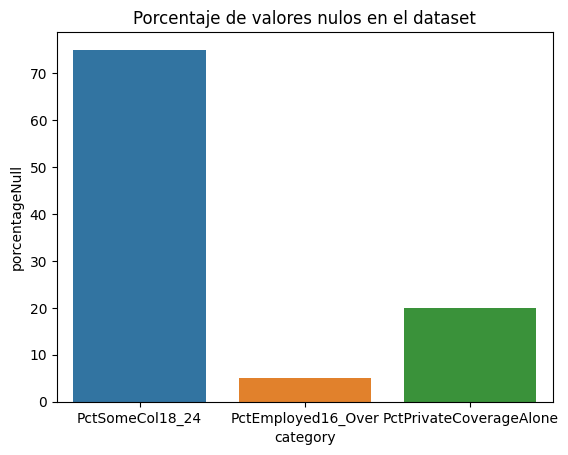

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creación de una lista con los nombres de las categorias de la BD
A = df_cancer.columns

# Cuantificación de los valores nulos por categoria
B = [df_cancer[df_cancer.columns[i]].isnull().sum() for i in range(df_cancer.shape[1]-1)]

# Creación de un diccionario con ambos valores
C = dict(zip(A, B))

# Creación de un dataframe a partir del diccionario anterior
df = pd.DataFrame([[key, C[key]] for key in C.keys()], columns=['category', 'nullCount'])

# Selección de las categorias con valores nulos
df_B = df[df['nullCount']!= 0]

# Tranformación a porcentaje de los valores
def porcentajeValorNulos(a):
  return a/len(df_cancer)*100

df_B['porcentageNull'] = df_B['nullCount'].apply(porcentajeValorNulos)

# Elaboración del gráfico de barras
sns.barplot(data= df_B, x= 'category', y= 'porcentageNull', errorbar= None)
plt.title('Porcentaje de valores nulos en el dataset')
plt.show()

***

> *En la siguiente exploración de los datos cuantitativos, se aborda las variables 'binnedInc' y 'Geography'.*

In [ ]:
df_cancer[['Geography', 'binnedInc']].sample(3)

,Geography,binnedInc
2100,"Tompkins County, New York","(51046.4, 54545.6]"
1531,"Marshall County, Oklahoma","(37413.8, 40362.7]"
736,"Marion County, Tennessee","(40362.7, 42724.4]"


> *En particular, con la variable de 'Geography', es posible llevar a cabo un proceso de separación para realizar un estudio detallado de los estados o condados.*

In [ ]:
# Obtener de la variable Geography la variable State
# Definir una función personalizada
def separar_elementos(x):
    return x.split(', ')[1]

# Aplicar la función a la columna 'Geography' usando apply()
df_cancer['State'] = df_cancer['Geography'].apply(separar_elementos)

print('La cantidad de Estados son: ', len(df_cancer['State'].unique()))

La cantidad de Estados son:  51


In [ ]:
# Obtener de la variable Geography la variable County
# Definir una función personalizada
def separar_elementos(x):
    return x.split(', ')[0]

# Aplicar la función a la columna 'Geography' usando apply()
df_cancer['County'] = df_cancer['Geography'].apply(separar_elementos)

print('La cantidad de Condados son: ', len(df_cancer['County'].unique()))

La cantidad de Condados son:  1819


> *Resultados obtenidos:*
- *Es posible realizar la agrupación de algunos datos y brindar un valor más significativo.*
- *Aumenta la cantidad de variables de la base de datos de 33 a 35.*


> *Nota:*
- *Se propone realizar una agrupación por Estados, así aumentar la cantidad de información de las variables con pocos datos.*
***

### 3. Identificar datos atípicos (un punto)

Dentro del EDA debe incluir un análisis de datos atípicos y en caso de detectarlos, deberá proponer formas de trabajar o arreglar dichos valores.

> *De acuerdo con los resultados previos, se identificó que una de las variables con mayor valores nulos es 'PctSomeCol18_24'. Y en consecuencia con los primeros análisis de las variables es posible mencionar que esta variable es un porcentaje que hace para de un conjunto de otras tres, las cuales al sumar su porcentaje este valor debe ser igual a 1. Por ende, para dar solución a estos datos atipicos se realiza una operación de suma de las variables conocidas y se obtiene el complemento para hallar el valor correspodiente al dato nulo.*

In [ ]:
# Recuperación de los datos de la columna PctSomeCol18_24 en la base de datos
def sumaElementos(a, b, c):
  return a+b+c

df_cancer['PctSomeCol18_24'] = df_cancer.apply(lambda row: sumaElementos(row['PctNoHS18_24'], row['PctHS18_24'], row['PctBachDeg18_24']), axis=1)
df_cancer[['PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24','PctBachDeg18_24']].sample(5)

,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24
480,21.6,41.4,67.2,4.2
718,14.8,54.4,75.6,6.4
1381,10.7,45.7,62.3,5.9
386,15.5,26.0,58.0,16.5
2607,9.6,39.8,53.5,4.1


***
> *A continuación se procede a realizar dos ejercicios:*
- *Elaboración del diagrama de cajas para cada una de las variables*
- *Tabla con los valores mínimos, máximo y media.*

> ***Diagrama de cajas***

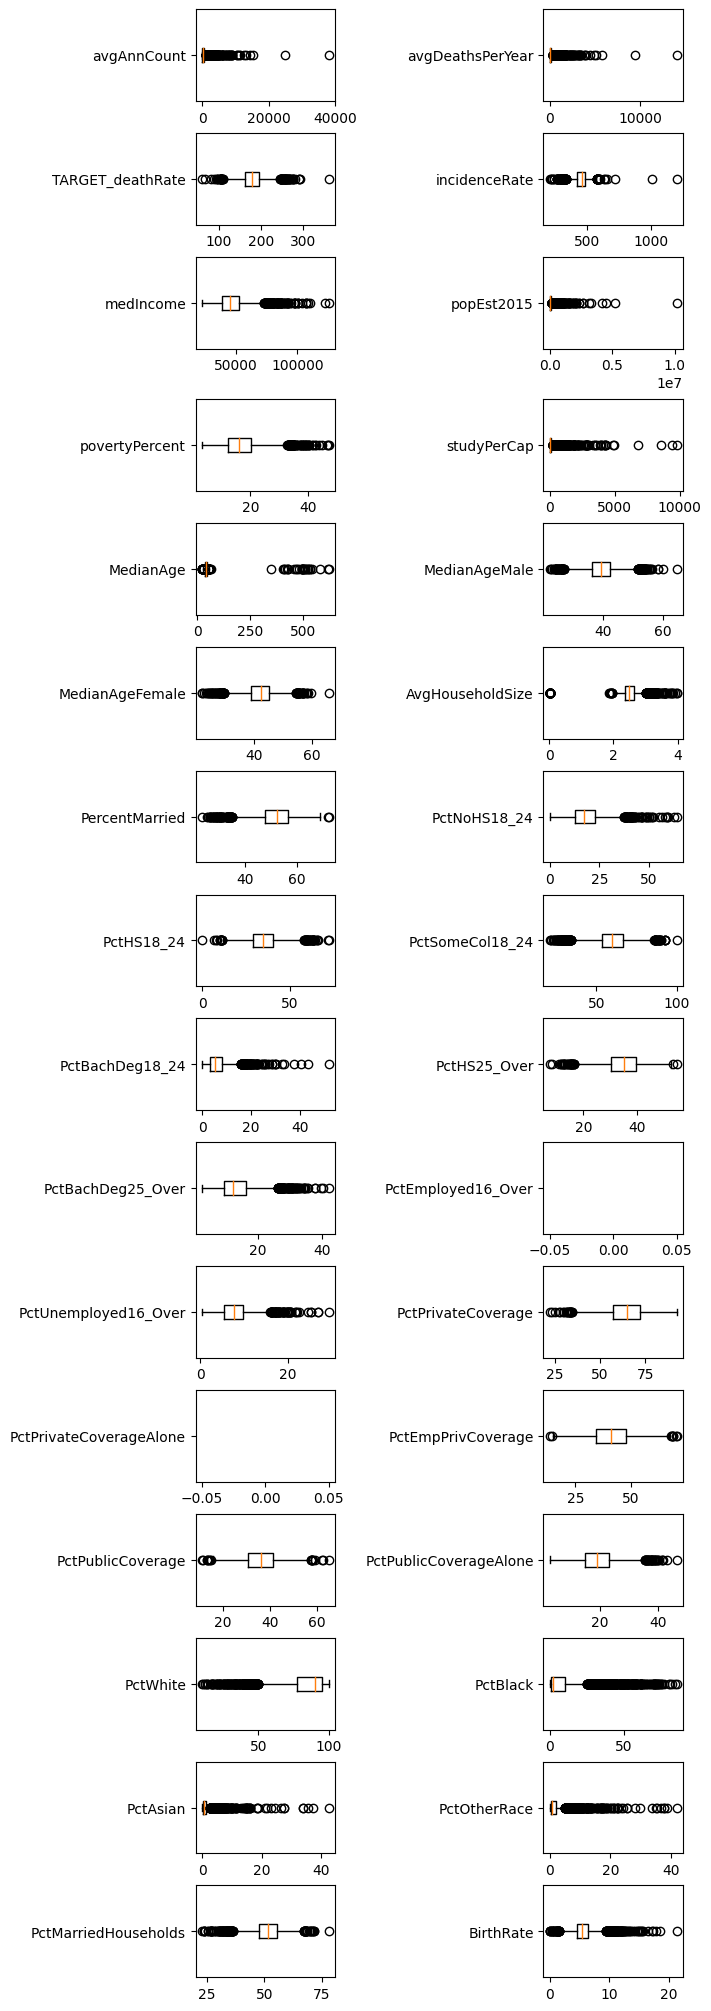

In [ ]:
fig = plt.figure(figsize=(7,20), layout='constrained')
axs = fig.subplot_mosaic([['ax1','ax2'],
                          ['ax3', 'ax4'],
                          ['ax5', 'ax6'],
                          ['ax7', 'ax8'],
                          ['ax9', 'ax10'],
                          ['ax11', 'ax12'],
                          ['ax13', 'ax14'],
                          ['ax15', 'ax16'],
                          ['ax17', 'ax18'],
                          ['ax19', 'ax20'],
                          ['ax21', 'ax22'],
                          ['ax23', 'ax24'],
                          ['ax25', 'ax26'],
                          ['ax27', 'ax28'],
                          ['ax29', 'ax30'],
                          ['ax31', 'ax32'],])

# Seleccionar solo las columnas cuantitativas (numéricas)
df_cancer_cuantitativo = df_cancer.select_dtypes(include=['int', 'float'])

# Por medio de este ciclo es posible realizar un diagrama de cajas de todas las variables cuantitativas.
for i in range(1, 33):
  axs['ax'+str(i)].boxplot(df_cancer[df_cancer_cuantitativo.columns[i-1]], vert=False)
  axs['ax'+str(i)].set_yticklabels([df_cancer_cuantitativo.columns[i-1]])

***
> ***Valores mínimos, máximos y media***

In [ ]:
min_max_por_columna = []

for columna in df_cancer_cuantitativo.columns:
  min_max = df_cancer_cuantitativo[columna].min().round(2), df_cancer_cuantitativo[columna].max().round(2)
  min_max_por_columna.append(min_max)

valoresMinMax = dict(zip(list(df_cancer_cuantitativo.columns), min_max_por_columna))

dfMinMax = pd.DataFrame(valoresMinMax, index=["Mín", "Máx"])
dfMinMax = dfMinMax.T
dfMinMax

,Mín,Máx
avgAnnCount,6.00,38150.00
avgDeathsPerYear,3.00,14010.00
TARGET_deathRate,59.70,362.80
incidenceRate,201.30,1206.90
medIncome,22640.00,125635.00
popEst2015,827.00,10170292.00
povertyPercent,3.20,47.40
studyPerCap,0.00,9762.31
MedianAge,22.30,624.00
MedianAgeMale,22.40,64.70


> *Resultados obtenidos*
- *En primera instancia es necesario mencionar que para las variables 'PctEmployed16Over' y 'PctPrivateCoverageAlone' no es posible obtener una diagrama de cajas esto se debe a que se tiene algunas variables nulas. Sin embargo, se tienen en cuenta para los procesos posteriores para determinar su importancia hacia la variable objetivo.*
- *De acuerdo con los valores mínimos y máximos es posible mencionar que la variable 'MedianAge' posee varios valores fuera de lo normal, este resultado también se confronta con el diagrama de caja el cual proporciona la misma información.*
- *Explorando los diferentes diagramas de cajas, es evidente que teoricamente se cuenta con valores atipicos en todas las variables. Cabe señalar que es necesario tener en cuenta el origen y relación que pueda tener cada una de las variables, por ende, se realizará los siguientes análisis para adquirir mayores argumentos que permitan identificar su importancia al objetivo del ejercicio.*

In [ ]:
df_cancer[['MedianAge', 'MedianAgeMale', 'MedianAgeFemale']]

,MedianAge,MedianAgeMale,MedianAgeFemale
0,39.3,36.9,41.7
1,33.0,32.2,33.7
2,45.0,44.0,45.8
3,42.8,42.2,43.4
4,48.3,47.8,48.9
...,...,...,...
3042,44.2,41.1,48.8
3043,30.4,29.3,31.4
3044,30.9,30.5,31.2
3045,39.0,36.9,40.5


In [ ]:
# Recuperación de los datos de la columna PctSomeCol18_24 en la base de datos
def promedioData(a, b):
  return (a+b)/2

df_cancer['MedianAge'] = df_cancer.apply(lambda row: promedioData(row['MedianAgeMale'], row['MedianAgeFemale']), axis=1)
df_cancer[['MedianAge', 'MedianAgeMale', 'MedianAgeFemale',]].sample(5)

,MedianAge,MedianAgeMale,MedianAgeFemale
622,44.75,44.7,44.8
2141,40.50,38.8,42.2
2166,37.45,38.3,36.6
1962,35.95,34.5,37.4
751,46.15,45.3,47.0


> *En el caso de los datos nulos que posee la variable 'PctEmployed16_Over' se lleva a cabo la eliminación de las filas.*

In [ ]:
# Nombre de la columna con valores nulos que deseas revisar
columna_con_nulos = 'PctEmployed16_Over'

# Revisar los valores nulos en la columna especificada
print("Valores nulos en la columna {}: {}".format(columna_con_nulos, df_cancer.PctEmployed16_Over.isnull().sum()))

# Eliminar filas con valores nulos en la columna especificada
df_cancer = df_cancer.dropna(subset='PctEmployed16_Over')

# Nuevas dimensiones del DataFrame
print("Cantidad de datos: {} | Cantidad de variables: {}" .format(df_cancer.shape[0], df_cancer.shape[1]))

Valores nulos en la columna PctEmployed16_Over: 152
Cantidad de datos: 2895 | Cantidad de variables: 36


***
> *Detección y eliminación de Outliers
[Explicación de Outliers](https://www.youtube.com/watch?v=P8ls1Wjmpkw)*

***NOTA***
> *Debido a la cantidad de información que se pierde al momento de realizar el procedimiento de Outliers NO se emplea este procedimiento.*

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# ## Visualización de las caracteristicas de una variable particular

# def descripcionVariable(x):
#   print(x.describe().round())

#   fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

#   # Diagrama de caja de la variable objetivo para identificar visualmente
#   # los Outliers
#   ax1.boxplot(x, vert=False)
#   ax1.set_title('Diagrama de caja - Outliers')
#   ax1.set_yticklabels([x.name])

#   # Distribución de los datos a partir de un histograma
#   ax2.hist(x, edgecolor='black', linewidth=1)
#   ax2.set_title('Histograma')
#   ax2.set_ylabel('Frecuencia')
#   ax2.set_xlabel(x.name)

#   plt.show()

# ## Proceso para elimnar los Outliers de la base de datos

# def calculosPrevios(dfConOutliers):
#   '''Función encarga de realizar los cálculos de los cuartiles,
#   intercuatiles, mediana, valor máximo, mínimo,...'''
#   Q1 = dfConOutliers.quantile(0.25)
#   #print('Primer Cuartil', Q1)

#   Q3 = dfConOutliers.quantile(0.75)
#   #print('Tercer Cuartil', Q3)

#   IQR = Q3 - Q1
#   #print('Rango Intercuartil', IQR)

#   Mediana = dfConOutliers.median()
#   #print('Mediana', Mediana)

#   valorMax = dfConOutliers.max()
#   #print('Máximo', valorMax)

#   valorMin = dfConOutliers.min()
#   #print('Mínimo', valorMin)

#   BI_Calc = (Q1 - 1.5*IQR)
#   #print('BI_Calc \n', BI_Calc)

#   BS_Calc = (Q1 + 1.5*IQR)
#   #print('BS_Calc \n', BS_Calc)

#   return [Q1, Q3, IQR, Mediana, valorMax, valorMin, BI_Calc, BS_Calc]

# def eliminarOutliers(dfConOutliers):
#   '''Función que permite eliminar los Outliers relacionados con la variable
#   seleccionada en la base de datos.'''

#   resultadosPrevios = calculosPrevios(df_cancer['PctEmployed16_Over'])

#   ubiSinOutliers = (df_cancer['PctEmployed16_Over'] >= resultadosPrevios[6]) & (df_cancer['PctEmployed16_Over'] <= resultadosPrevios[7])
#   sinOutliers = df_cancer[ubiSinOutliers]

#   diferenciaOutliers = len(dfConOutliers)-len(sinOutliers)

#   return diferenciaOutliers, sinOutliers

In [ ]:
# minimoOutliers = 0
# iteracionesOutliers = 0

# print('------------------------- Variable Original -------------------------')
# descripcionVariable(df_cancer['PctEmployed16_Over'])

# while True:
#   iteracionesOutliers += 1
#   cantidadOutliers, df_cancer = eliminarOutliers(df_cancer)
#   if cantidadOutliers == minimoOutliers:
#     print('\n \n------------------------- Sin Outliers -------------------------')
#     descripcionVariable(df_cancer['PctEmployed16_Over'])
#     break

# print('\n')
# print(f'Cantidad de iteraciones realizadas para eliminar los Outliers: {iteracionesOutliers}')
# print(f'La nueva dimensión del DataFrame es: {df_cancer.shape}')

In [ ]:
revisionEdad = {'MedianAge': [df_cancer.MedianAge.max(), df_cancer.MedianAge.min()],
                'MedianAgeMale': [df_cancer.MedianAgeMale.max(), df_cancer.MedianAgeMale.min()],
                'MedianAgeFemale': [df_cancer.MedianAgeFemale.max(), df_cancer.MedianAgeFemale.min()]}
dfRevisionEdad = pd.DataFrame(revisionEdad, index=["Máx", "Mín"])
dfRevisionEdad

,MedianAge,MedianAgeMale,MedianAgeFemale
Máx,65.20,64.7,65.7
Mín,22.35,22.4,22.3


In [ ]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2895 entries, 0 to 3046
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2895 non-null   float64
 1   avgDeathsPerYear         2895 non-null   int64  
 2   TARGET_deathRate         2895 non-null   float64
 3   incidenceRate            2895 non-null   float64
 4   medIncome                2895 non-null   int64  
 5   popEst2015               2895 non-null   int64  
 6   povertyPercent           2895 non-null   float64
 7   studyPerCap              2895 non-null   float64
 8   binnedInc                2895 non-null   object 
 9   MedianAge                2895 non-null   float64
 10  MedianAgeMale            2895 non-null   float64
 11  MedianAgeFemale          2895 non-null   float64
 12  Geography                2895 non-null   object 
 13  AvgHouseholdSize         2895 non-null   float64
 14  PercentMarried          

> *Debido al tipo de datos que maneja la base de datos, se llevó a cabo la correción de solo dos variables con datos atipicos o nulos, tal como se menciona a continuación:*
- *La variable 'MedianAge' posterior al proceso de eliminación de Outliers, en comparación con las variables 'MedianAgeMale' y 'MedianAgeFemale' posee valores dentro de un rango adecuado.*
- *Luego del proceso de eliminación de datos por valores nulos, la cantidad de datos pasa de 3047 a 2895.*
- *Con las variables de porcentaje, se corrigio la variable 'PctSomeCol18_24' a partir de complementar con los otros valores, en el caso de las otras dos variables, se realizará un estudio de correlación para determinar su importancia.*

***
> *A continuación, se divide la base de datos en dos, variables cualitativas de las cuantitivas.*

In [ ]:
# Seleccionar solo las columnas cuantitativas (numéricas)
df_cancer_cuantitativo = df_cancer.select_dtypes(include=['int', 'float'])
#df_cancer_cuantitativo
# Seleccionar solo las columnas cualitativos
df_cancer_cualitativo = df_cancer[['Geography','State','County']]
#df_cancer_cualitativo

### 4. Análisis con datos multivariados (un punto)

Analice la interacción entre variables por medio de análisis multivariado.<br>
Haga uso de gráficos para complementar este análisis.

> *Es importante señalar que se considera que con los datos actuales de la base de datos es imposible realizar un análisis multivariado, sin embargo, se lleva a cabo un análisis bivariado de tal forma que se pueda obtener información de la realación que posee la variable objetivo.*

***
> ***Análisis General de todas las variables cuantitativas***

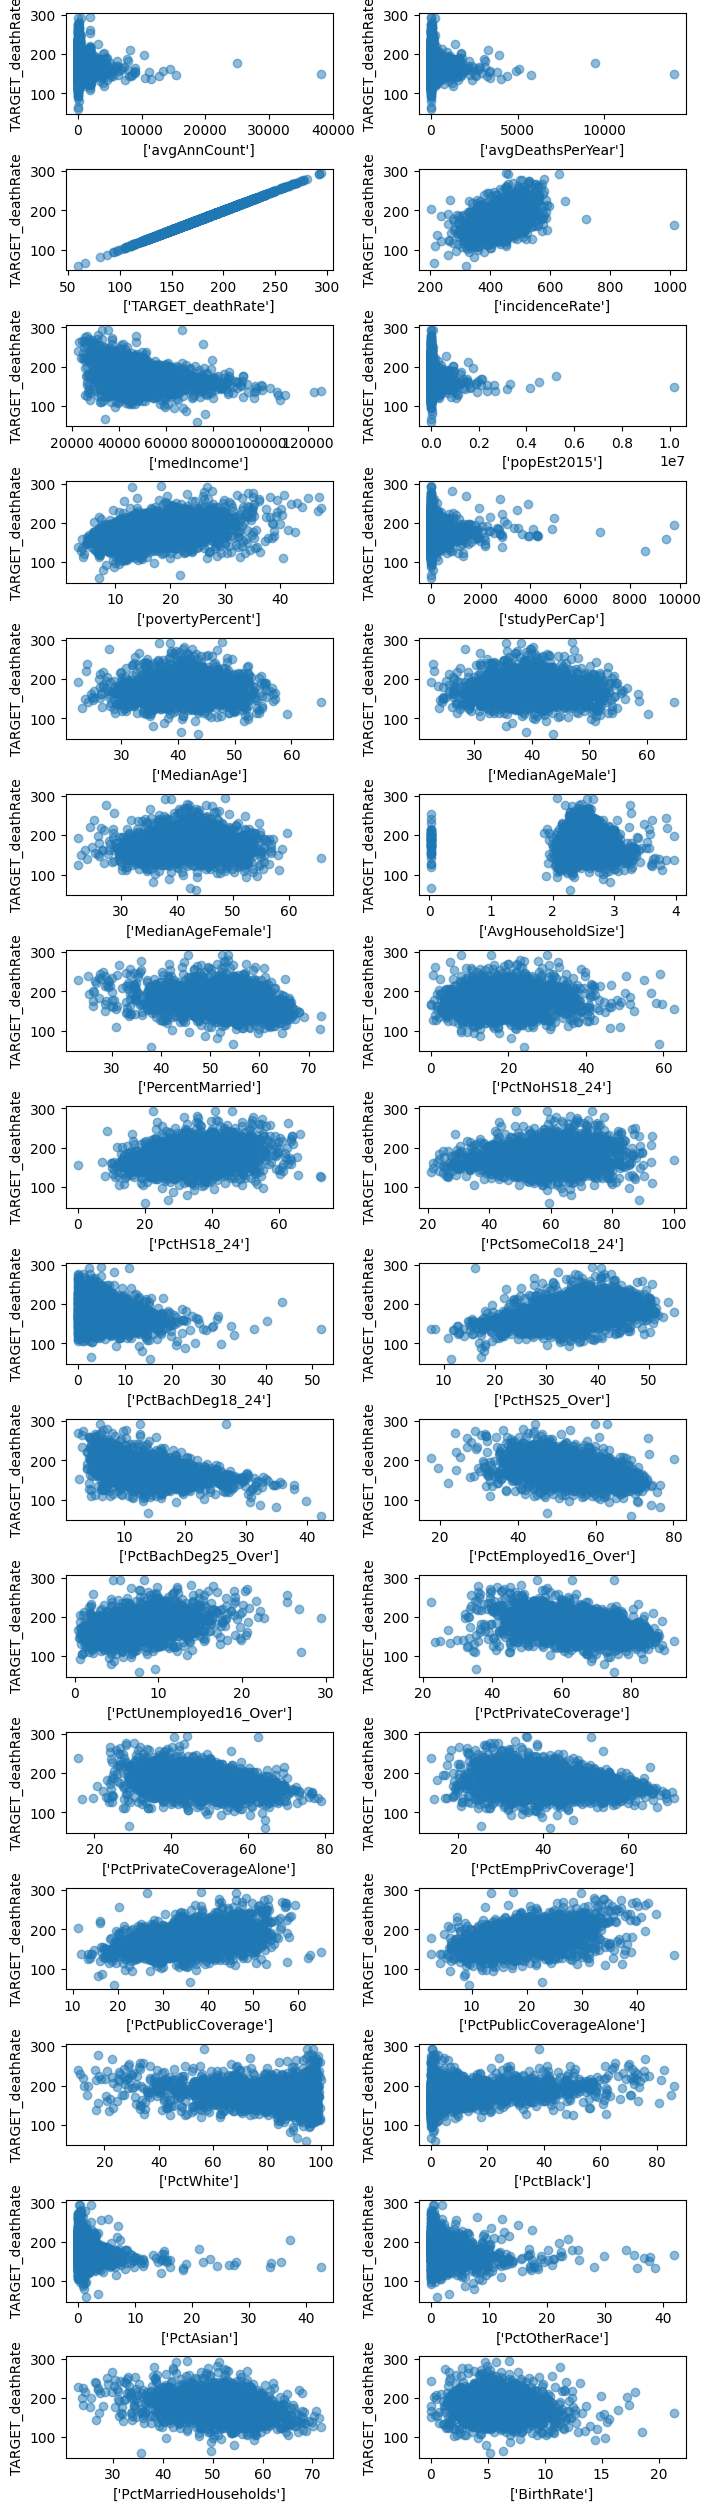

In [ ]:
fig = plt.figure(figsize=(7,25), layout='constrained')
axs = fig.subplot_mosaic([['ax1','ax2'],
                          ['ax3', 'ax4'],
                          ['ax5', 'ax6'],
                          ['ax7', 'ax8'],
                          ['ax9', 'ax10'],
                          ['ax11', 'ax12'],
                          ['ax13', 'ax14'],
                          ['ax15', 'ax16'],
                          ['ax17', 'ax18'],
                          ['ax19', 'ax20'],
                          ['ax21', 'ax22'],
                          ['ax23', 'ax24'],
                          ['ax25', 'ax26'],
                          ['ax27', 'ax28'],
                          ['ax29', 'ax30'],
                          ['ax31', 'ax32'],])

# Seleccionar solo las columnas cuantitativas (numéricas)
df_cancer_cuantitativo = df_cancer.select_dtypes(include=['int', 'float'])

# Por medio de este ciclo es posible realizar un diagrama de cajas de todas las variables cuantitativas.
for i in range(1, 33):
  # axs['ax'+str(i)].boxplot(df_cancer[df_cancer_cuantitativo.columns[i-1]], vert=False)
  axs['ax'+str(i)].scatter(data=df_cancer_cuantitativo, x=df_cancer_cuantitativo.columns[i-1], y='TARGET_deathRate', c='tab:blue', alpha=0.5)
  axs['ax'+str(i)].set_ylabel('TARGET_deathRate')
  axs['ax'+str(i)].set_xlabel([df_cancer_cuantitativo.columns[i-1]])

### 5. Correlación entre variables (un punto)

Por último, para cerrar el análisis exploratorio, realice un análisis de la correlación entre variables y explique los resultados obtenidos.

#### 5.1 Realice un mapa de calor con una matriz de correlación

> *Antes de realizar la matriz de correlación se ajusta todas las variables cuantitativas a una estala estandar haciendo uso de la biblioteca 'Scikit-Learn' empleando 'StandarddScaler'. Con el objetivo de mejorar la comparabilidad y la interpretación de las relaciones entre variables al eliminar el efecto de las diferencias de escala.*

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos en el DataFrame
df_estandarizado = pd.DataFrame(scaler.fit_transform(df_cancer_cuantitativo), columns=df_cancer_cuantitativo.columns)

In [ ]:
# Mostrar el DataFrame estandarizado
print("DataFrame original:")
df_cancer_cuantitativo.head(5)

DataFrame original:


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.30,36.9,41.7,2.54,52.5,11.5,39.5,57.9,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,32.95,32.2,33.7,2.34,44.5,6.1,22.4,36.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,44.90,44.0,45.8,2.62,54.2,24.0,36.6,70.1,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.80,42.2,43.4,2.52,52.7,20.2,41.2,63.9,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.35,47.8,48.9,2.34,57.8,14.9,43.0,59.9,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [ ]:
print("\nDataFrame estandarizado:")
df_estandarizado.head(5)


DataFrame estandarizado:


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,0.544890,0.548418,-0.500322,0.793341,1.236695,0.465430,-0.889667,0.632155,-0.307979,-0.515803,-0.091599,0.143559,0.106115,-0.831022,0.490987,-0.139766,0.159380,-1.655696,1.186128,-0.270958,0.041232,1.014166,NaN,0.047120,-0.435643,-0.862388,-0.111935,-0.449344,1.344938,-0.045525,0.249813,0.240832
1,-0.303898,-0.228807,-0.631421,-0.689721,0.093408,-0.179712,0.262219,-0.248719,-1.537410,-1.414303,-1.607887,-0.326981,-1.057089,-1.497645,-1.388514,-2.129489,0.291046,-1.256602,1.764599,0.210180,-0.016727,0.553813,0.538839,0.259042,-0.665335,-0.649796,0.343596,-0.561051,0.372209,0.486408,-0.897719,-0.651534
2,-0.353133,-0.267766,-0.143442,-1.863654,0.194777,-0.245883,-0.360422,-0.203535,0.776244,0.841505,0.685498,0.331775,0.353296,0.712089,0.172242,0.968664,0.729936,-0.829002,0.514355,-0.992664,-0.248561,-0.056860,-0.483790,-0.662815,0.738338,0.298691,0.447185,-0.576817,-0.300165,0.207813,0.493438,-0.953168
3,-0.127760,0.028320,0.588525,-0.333179,-0.229047,-0.082692,0.028729,0.341798,0.369660,0.497399,0.230612,0.096505,0.135195,0.242983,0.677838,0.405364,-0.806177,-0.458416,-0.735888,-0.703982,1.229380,-0.554793,-0.801500,-0.652219,1.146679,0.936466,0.497490,-0.573865,-0.037512,-0.180293,-0.031499,-0.516237
4,-0.384338,-0.314516,-1.246856,-1.856068,0.245171,-0.277729,-0.687309,-0.291431,1.444203,1.567952,1.273060,-0.326981,0.876737,-0.411296,0.875681,0.041944,-0.915899,-0.201856,0.327752,-0.716010,-0.886104,-0.254154,-0.444076,-0.641623,0.980790,0.560342,0.641791,-0.609078,-0.224657,-0.424277,0.429433,0.579555


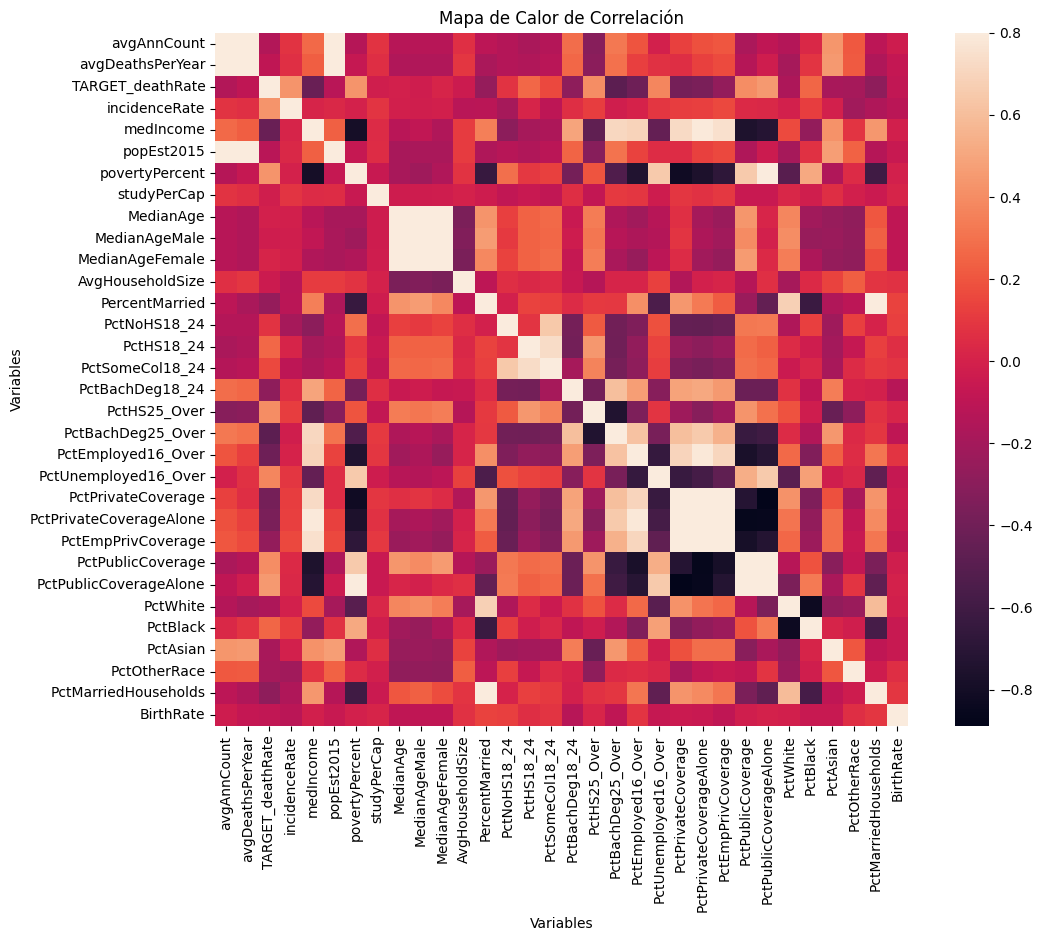

In [ ]:
import pandas as pd

# Calcula la matriz de correlación
correlation_matrix = df_estandarizado.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix, vmax=.8, square=True)

plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [ ]:
# Cantidad de variables con correlación superior a 0.45 y listado de las variables
dataTemp = correlation_matrix['TARGET_deathRate'].abs()>0.4
print('Cantidad de elementos con correlación:', dataTemp.sum())
print('Lista de las variables con mayor correlación:')
for i in range(df_cancer.shape[1]-4):
  if dataTemp[i]:
    print('- ' + dataTemp.index.tolist()[i])

Cantidad de elementos con correlación: 9
Lista de las variables con mayor correlación:
- TARGET_deathRate
- incidenceRate
- medIncome
- povertyPercent
- PctHS25_Over
- PctBachDeg25_Over
- PctEmployed16_Over
- PctPublicCoverage
- PctPublicCoverageAlone


***
> ***Análisis particular de las variables con mayor correlación***

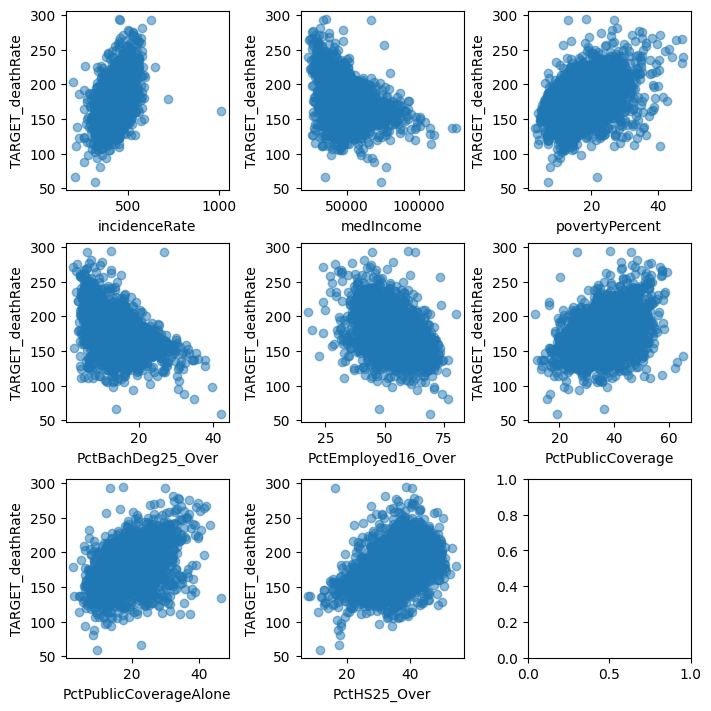

In [ ]:
fig = plt.figure(figsize=(7, 7),layout='constrained')
axs = fig.subplot_mosaic([['ax1','ax2','ax3'],
                          ['ax4', 'ax5','ax6'],
                          ['ax7','ax8','ax9']])

axs['ax1'].scatter(data=df_cancer, x='incidenceRate', y='TARGET_deathRate', alpha=0.5)
axs['ax1'].set_ylabel('TARGET_deathRate')
axs['ax1'].set_xlabel('incidenceRate')

axs['ax2'].scatter(data=df_cancer, x='medIncome', y='TARGET_deathRate', alpha=0.5)
axs['ax2'].set_ylabel('TARGET_deathRate')
axs['ax2'].set_xlabel('medIncome')

axs['ax3'].scatter(data=df_cancer, x='povertyPercent', y='TARGET_deathRate', alpha=0.5)
axs['ax3'].set_ylabel('TARGET_deathRate')
axs['ax3'].set_xlabel('povertyPercent')

axs['ax4'].scatter(data=df_cancer, x='PctBachDeg25_Over', y='TARGET_deathRate', alpha=0.5)
axs['ax4'].set_ylabel('TARGET_deathRate')
axs['ax4'].set_xlabel('PctBachDeg25_Over')

axs['ax5'].scatter(data=df_cancer, x='PctEmployed16_Over', y='TARGET_deathRate', alpha=0.5)
axs['ax5'].set_ylabel('TARGET_deathRate')
axs['ax5'].set_xlabel('PctEmployed16_Over')

axs['ax6'].scatter(data=df_cancer, x='PctPublicCoverage', y='TARGET_deathRate', alpha=0.5)
axs['ax6'].set_ylabel('TARGET_deathRate')
axs['ax6'].set_xlabel('PctPublicCoverage')

axs['ax7'].scatter(data=df_cancer, x='PctPublicCoverageAlone', y='TARGET_deathRate', alpha=0.5)
axs['ax7'].set_ylabel('TARGET_deathRate')
axs['ax7'].set_xlabel('PctPublicCoverageAlone')

axs['ax8'].scatter(data=df_cancer, x='PctHS25_Over', y='TARGET_deathRate', alpha=0.5)
axs['ax8'].set_ylabel('TARGET_deathRate')
axs['ax8'].set_xlabel('PctHS25_Over')

plt.show()

#### 5.2 Realice un mapa de calor con una matriz de varianza-covarianza

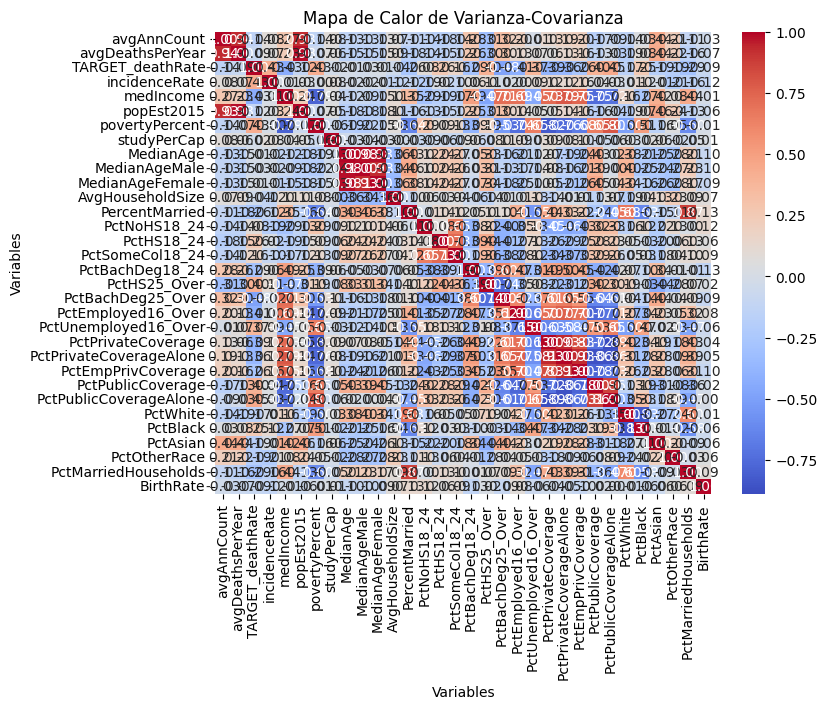

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de varianza-covarianza
cov_matrix = df_estandarizado.cov()

# # Mostrar la matriz de varianza-covarianza
# print("Matriz de Varianza-Covarianza:")
# print(cov_matrix)

# Crear el mapa de calor
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico si es necesario
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Añade etiquetas de ejes y título
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Mapa de Calor de Varianza-Covarianza')

# Muestra el mapa de calor
plt.show()

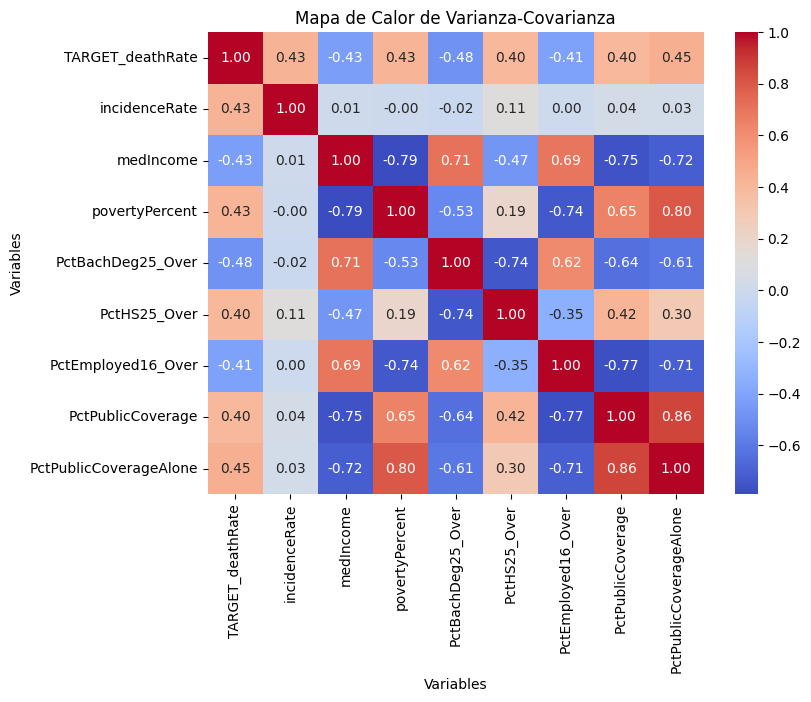

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de varianza-covarianza
cov_matrix = df_estandarizado[['TARGET_deathRate', 'incidenceRate', 'medIncome', 'povertyPercent', 'PctBachDeg25_Over',
                               'PctHS25_Over','PctEmployed16_Over', 'PctPublicCoverage', 'PctPublicCoverageAlone']].cov()

# # Mostrar la matriz de varianza-covarianza
# print("Matriz de Varianza-Covarianza:")
# print(cov_matrix)

# Crear el mapa de calor
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico si es necesario
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', vmax=1, fmt=".2f")

# Añade etiquetas de ejes y título
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Mapa de Calor de Varianza-Covarianza')

# Muestra el mapa de calor
plt.show()

Luego de este extenso análisis de los datos, argumente cuáles son las varaibles que considera de mayor utilidad, con cuáles considera continuar y elimine las columnas que no va a utilizar.

### 6. Eliminar columnas innecesarias (drop) (un punto)

> *De acuerdo con el proceso antes realizado se asumen las variables con mayor relación las obtenidas en la matriz de correolación y las de varianza-covarianza:*
- *incidenceRate*
- *medIncome*
- *povertyPercent*
- *PctHS25_Over*
- *PctBachDeg25_Over*
- *PctEmployed16_Over*
- *PctPublicCoverage*
- *PctPublicCoverageAlone*

In [ ]:
df_cancerF = df_estandarizado[['TARGET_deathRate', 'incidenceRate', 'medIncome', 'povertyPercent',
                       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPublicCoverage',
                       'PctPublicCoverageAlone']]

## Regresión Lineal
    

Luego de analizar la base de datos, realice diversos modelos de regresión lineal que le permitan predecir la variable dependiente `TARGET_deathRate`. Al final de este trabajo, deberá explicar cuál de los modelos se ajusta mejor a los datos y logra predecir mejor la cantidad de muertes por cancer.

### 7 Regresión lineal simple con una variable numérica (un punto)

Genere un modelo de regresión lineal simple con una variable numérica.<br>
Analice los componentes del modelo y si se cumplen los <b>supuestos</b> vistos en clase.
Finalmente, luego de generar el modelo genere un gráfico de dispersión con el modelo lineal.

> ***Modelo intento No. 1 con Statsmodels***

                                 OLS Regression Results                                
Dep. Variable:       TARGET_deathRate   R-squared (uncentered):                   0.173
Model:                            OLS   Adj. R-squared (uncentered):              0.173
Method:                 Least Squares   F-statistic:                              423.9
Date:                Wed, 15 Nov 2023   Prob (F-statistic):                    1.13e-85
Time:                        00:06:09   Log-Likelihood:                         -2670.7
No. Observations:                2026   AIC:                                      5343.
Df Residuals:                    2025   BIC:                                      5349.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

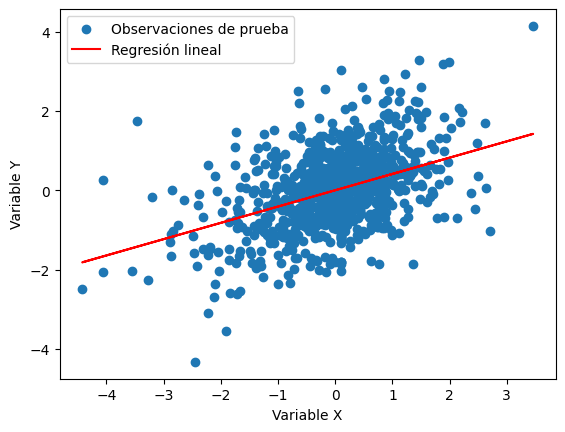

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Añadir una constante a la matriz de características (intercepto)
# X = sm.add_constant(df_cancerF['incidenceRate'])
X = df_cancerF[['incidenceRate']]
y = df_cancerF['TARGET_deathRate']

# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un modelo de regresión lineal con los datos de entrenamiento
modelo = sm.OLS(y_train, X_train)

# Ajustar el modelo a los datos de entrenamiento
resultado = modelo.fit()

# Imprimir un resumen del modelo
print(resultado.summary())

# Hacer predicciones en los datos de prueba
y_pred = resultado.predict(X_test)

# Graficar la dispersión y la línea de regresión en los datos de prueba
plt.scatter(X_test['incidenceRate'], y_test, label='Observaciones de prueba')
plt.plot(X_test['incidenceRate'], y_pred, color='red', label='Regresión lineal')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.legend()
plt.show()

***
> ***Modelo intento No. 1 con Sklearn***

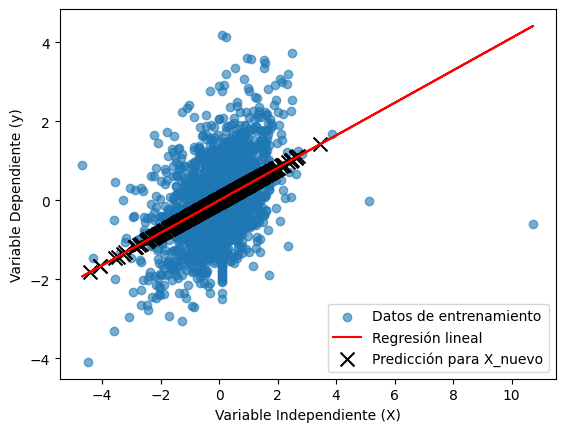

Mean Squared Error (MSE): 0.814
Root Mean Squared Error (RMSE): 0.902
R-squared (R^2): 0.207


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Crear un modelo de regresión lineal
model = LinearRegression()
X = df_cancerF[['incidenceRate']]
y = df_cancerF['TARGET_deathRate']

# Dividir los datos en conjuntos de entrenamiento y prueba (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo con los datos
model.fit(X_train, y_train)

# Obtener los parámetros de la regresión
coeficiente = model.coef_
intercepto = model.intercept_

# Hacer predicciones
X_nuevo = X_test
y_pred = model.predict(X_nuevo)

# Visualizar los resultados
plt.scatter(X_train, y_train, alpha=0.6, label='Datos de entrenamiento')
plt.plot(X_train, model.predict(X_train), color='red', label='Regresión lineal')
plt.scatter(X_nuevo, y_pred, color='black', marker='x', s=100, label='Predicción para X_nuevo')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.legend()
plt.show()

# ------------------------------------------------------------

from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse.round(3))

# Calcular el RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse.round(3))

# Calcular el R-cuadrado
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2.round(3))

***
> ***Verificación del los Supuestos***
- *Linealidad*
- *Independencia*
- *Homocedasticidad*
- *Normalidad*

***
> *Linealidad*
***

Text(0.5, 0, 'incidenceRate_test')

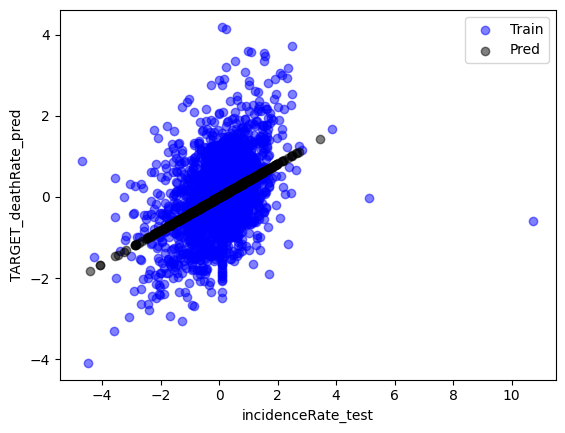

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Train')
plt.scatter(X_nuevo, y_pred, color='black', alpha=0.5, label='Pred')
plt.legend()
plt.ylabel('TARGET_deathRate_pred')
plt.xlabel('incidenceRate_test')

> *Resultado:*
*No cumple con el supuesto de Linealidad.*

***
> *Independencia*
***

In [ ]:
# Calcular los residuos
residuos = y_test - y_pred

# Realizar la prueba de Durbin-Watson en los residuos utilizando statsmodels
durbin_watson_statistic = sm.stats.durbin_watson(residuos)
print("Estadístico de Durbin-Watson:", durbin_watson_statistic)

Estadístico de Durbin-Watson: 1.8813713526324514


> *Resultado:*
*Cumple con el supuesto de Independencia.*

***
> *Homocedasticidad*
***

Text(0.5, 0, 'Residuales')

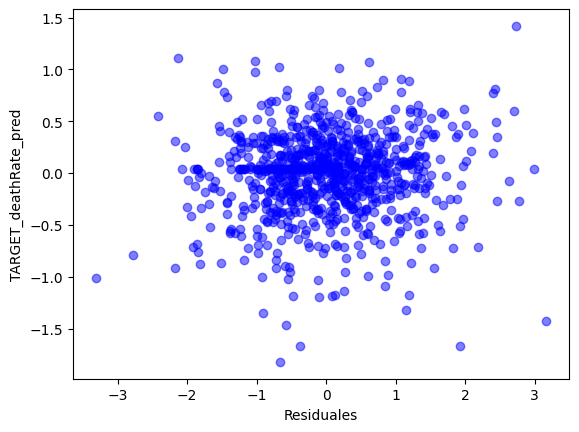

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.scatter(residuos, y_pred, color='blue', alpha=0.5)
plt.ylabel('TARGET_deathRate_pred')
plt.xlabel('Residuales')

> *Resultado:*
*Cumple con el supuesto de Homocedasticidad.*

***
> *Normalidad*
***

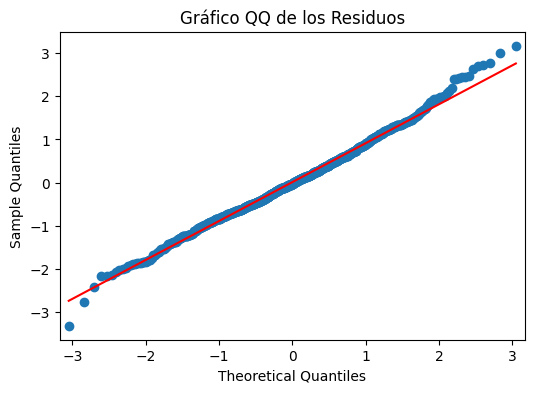

Estadístico de Shapiro-Wilk: 0.9951664209365845
Valor p de Shapiro-Wilk: 0.007556057069450617
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.
Estadístico de Kolmogorov-Smirnov: 0.04992345475250623
Valor p de Kolmogorov-Smirnov: 0.025396141670806838
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.


In [ ]:
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import kstest

# Crear un gráfico QQ de los residuos
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(residuos, line='s', ax=ax)
ax.set_title('Gráfico QQ de los Residuos')
plt.show()

# --------

# Realizar la prueba de Shapiro-Wilk en los residuos
stat_shapiro, p_valor_shapiro = shapiro(residuos)

# Imprimir el resultado de la prueba de Shapiro-Wilk
print("Estadístico de Shapiro-Wilk:", stat_shapiro)
print("Valor p de Shapiro-Wilk:", p_valor_shapiro)

# Interpretar el resultado
alpha = 0.05
if p_valor_shapiro > alpha:
    print("No se rechaza la hipótesis nula. Los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")

# --------

# Realizar la prueba de Kolmogorov-Smirnov en los residuos
stat_ks, p_valor_ks = kstest(residuos, 'norm')

# Imprimir el resultado de la prueba de Kolmogorov-Smirnov
print("Estadístico de Kolmogorov-Smirnov:", stat_ks)
print("Valor p de Kolmogorov-Smirnov:", p_valor_ks)

# Interpretar el resultado
alpha = 0.05
if p_valor_ks > alpha:
    print("No se rechaza la hipótesis nula. Los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")


> *Resultado:*
*Aunque a partir de la gráfica parece cumplir con el supuesto, los dos estadisticos Shapiro-Wilk y Kolmogorov-Smirnov se determina que NO cumple con el supuesto de Normalidad.*

***
> ***Modelo intento No. 2 con Sklearn***

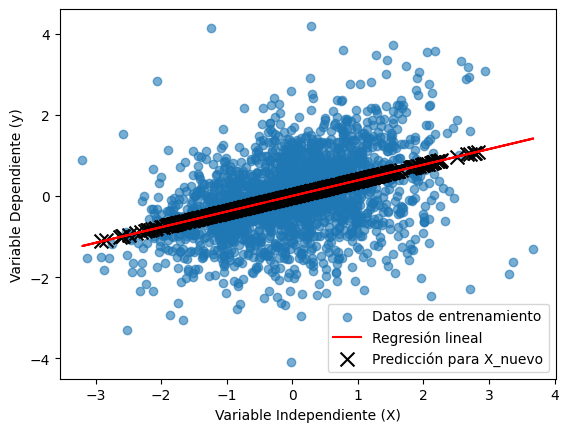

Mean Squared Error (MSE): 0.839
Root Mean Squared Error (RMSE): 0.916
R-squared (R^2): 0.183


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Crear un modelo de regresión lineal
model = LinearRegression()
X = df_cancerF[['PctPublicCoverage']]
y = df_cancerF['TARGET_deathRate']

# Dividir los datos en conjuntos de entrenamiento y prueba (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo con los datos
model.fit(X_train, y_train)

# Obtener los parámetros de la regresión
coeficiente = model.coef_
intercepto = model.intercept_

# Hacer predicciones
X_nuevo = X_test
y_pred = model.predict(X_nuevo)

# Visualizar los resultados
plt.scatter(X_train, y_train, alpha=0.6, label='Datos de entrenamiento')
plt.plot(X_train, model.predict(X_train), color='red', label='Regresión lineal')
plt.scatter(X_nuevo, y_pred, color='black', marker='x', s=100, label='Predicción para X_nuevo')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.legend()
plt.show()

# ------------------------------------------------------------

from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse.round(3))

# Calcular el RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse.round(3))

# Calcular el R-cuadrado
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2.round(3))

***
> ***Verificación del los Supuestos***
- *Linealidad*
- *Independencia*
- *Homocedasticidad*
- *Normalidad*

***
> *Linealidad*
***

Text(0.5, 0, 'incidenceRate_test')

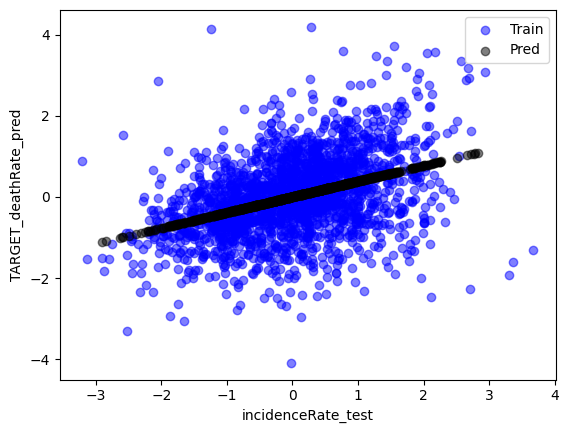

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Train')
plt.scatter(X_nuevo, y_pred, color='black', alpha=0.5, label='Pred')
plt.legend()
plt.ylabel('TARGET_deathRate_pred')
plt.xlabel('incidenceRate_test')

> *Resultado:*
*Cumple con el supuesto de Linealidad.*

***
> *Independencia*
***

In [ ]:
# Calcular los residuos
residuos = y_test - y_pred

# Realizar la prueba de Durbin-Watson en los residuos utilizando statsmodels
durbin_watson_statistic = sm.stats.durbin_watson(residuos)
print("Estadístico de Durbin-Watson:", durbin_watson_statistic)

Estadístico de Durbin-Watson: 1.9171732276436944


> *Resultado:*
*Cumple con el supuesto de Independencia.*

***
> *Homocedasticidad*
***

Text(0.5, 0, 'Residuales')

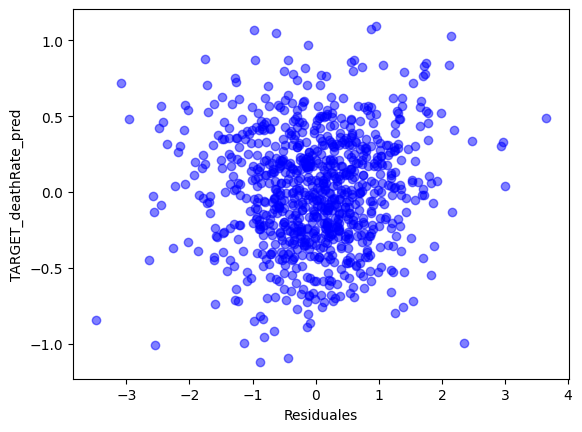

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.scatter(residuos, y_pred, color='blue', alpha=0.5)
plt.ylabel('TARGET_deathRate_pred')
plt.xlabel('Residuales')

> *Resultado:*
*Cumple con el supuesto de Homocedasticidad.*

***
> *Normalidad*
***

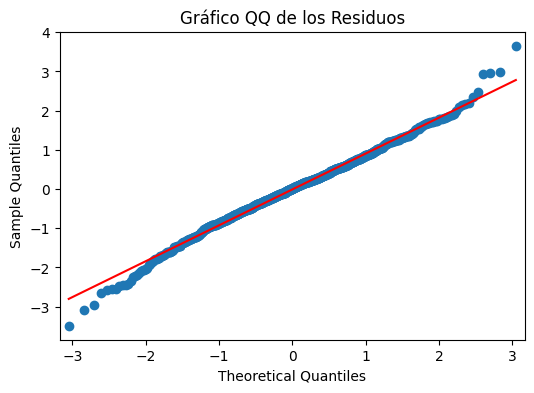

Estadístico de Shapiro-Wilk: 0.9940178394317627
Valor p de Shapiro-Wilk: 0.0015652991132810712
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.
Estadístico de Kolmogorov-Smirnov: 0.044703067384542994
Valor p de Kolmogorov-Smirnov: 0.060174408613316466
No se rechaza la hipótesis nula. Los residuos parecen seguir una distribución normal.


In [ ]:
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import kstest

# Crear un gráfico QQ de los residuos
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(residuos, line='s', ax=ax)
ax.set_title('Gráfico QQ de los Residuos')
plt.show()

# --------

# Realizar la prueba de Shapiro-Wilk en los residuos
stat_shapiro, p_valor_shapiro = shapiro(residuos)

# Imprimir el resultado de la prueba de Shapiro-Wilk
print("Estadístico de Shapiro-Wilk:", stat_shapiro)
print("Valor p de Shapiro-Wilk:", p_valor_shapiro)

# Interpretar el resultado
alpha = 0.05
if p_valor_shapiro > alpha:
    print("No se rechaza la hipótesis nula. Los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")

# --------

# Realizar la prueba de Kolmogorov-Smirnov en los residuos
stat_ks, p_valor_ks = kstest(residuos, 'norm')

# Imprimir el resultado de la prueba de Kolmogorov-Smirnov
print("Estadístico de Kolmogorov-Smirnov:", stat_ks)
print("Valor p de Kolmogorov-Smirnov:", p_valor_ks)

# Interpretar el resultado
alpha = 0.05
if p_valor_ks > alpha:
    print("No se rechaza la hipótesis nula. Los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")


> *Resultado:*
*Cumple con el supuesto de Normalidad.*

***
> ***Modelo intento No. 3 con Sklearn***

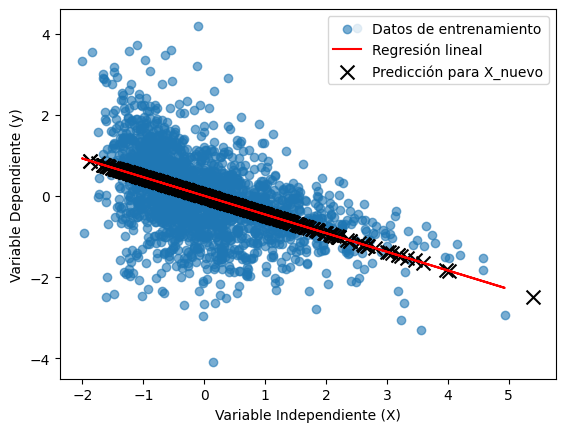

Mean Squared Error (MSE): 0.76
Root Mean Squared Error (RMSE): 0.872
R-squared (R^2): 0.259


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Crear un modelo de regresión lineal
model = LinearRegression()
X = df_cancerF[['PctBachDeg25_Over']]
y = df_cancerF['TARGET_deathRate']

# Dividir los datos en conjuntos de entrenamiento y prueba (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo con los datos
model.fit(X_train, y_train)

# Obtener los parámetros de la regresión
coeficiente = model.coef_
intercepto = model.intercept_

# Hacer predicciones
X_nuevo = X_test
y_pred = model.predict(X_nuevo)

# Visualizar los resultados
plt.scatter(X_train, y_train, alpha=0.6, label='Datos de entrenamiento')
plt.plot(X_train, model.predict(X_train), color='red', label='Regresión lineal')
plt.scatter(X_nuevo, y_pred, color='black', marker='x', s=100, label='Predicción para X_nuevo')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.legend()
plt.show()

# ------------------------------------------------------------

from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse.round(3))

# Calcular el RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse.round(3))

# Calcular el R-cuadrado
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2.round(3))

***
> ***Verificación del los Supuestos***
- *Linealidad*
- *Independencia*
- *Homocedasticidad*
- *Normalidad*

***
> *Linealidad*
***

Text(0.5, 0, 'incidenceRate_test')

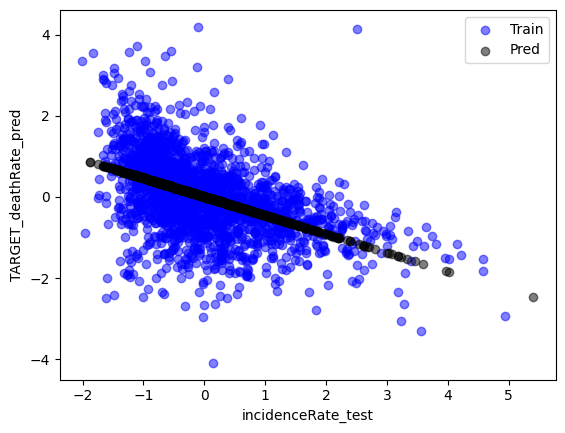

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Train')
plt.scatter(X_nuevo, y_pred, color='black', alpha=0.5, label='Pred')
plt.legend()
plt.ylabel('TARGET_deathRate_pred')
plt.xlabel('incidenceRate_test')

> *Resultado:*
*Cumple con el supuesto de Linealidad.*

***
> *Independencia*
***

In [ ]:
# Calcular los residuos
residuos = y_test - y_pred

# Realizar la prueba de Durbin-Watson en los residuos utilizando statsmodels
durbin_watson_statistic = sm.stats.durbin_watson(residuos)
print("Estadístico de Durbin-Watson:", durbin_watson_statistic)

Estadístico de Durbin-Watson: 1.975021160996363


> *Resultado:*
*Cumple con el supuesto de Independencia.*

***
> *Homocedasticidad*
***

Text(0.5, 0, 'Residuales')

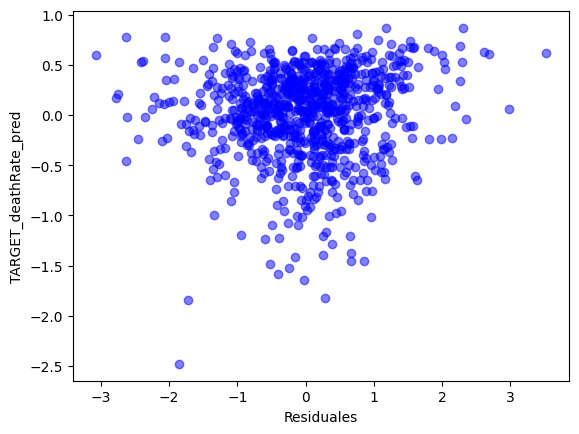

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.scatter(residuos, y_pred, color='blue', alpha=0.5)
plt.ylabel('TARGET_deathRate_pred')
plt.xlabel('Residuales')

> *Resultado:*
*Cumple con el supuesto de Homocedasticidad.*

***
> *Normalidad*
***

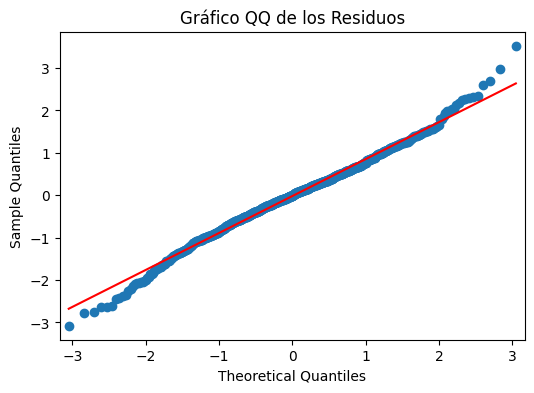

Estadístico de Shapiro-Wilk: 0.9921825528144836
Valor p de Shapiro-Wilk: 0.0001510945294285193
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.
Estadístico de Kolmogorov-Smirnov: 0.06764274191989195
Valor p de Kolmogorov-Smirnov: 0.0006685738020920385
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.


In [ ]:
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import kstest

# Crear un gráfico QQ de los residuos
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(residuos, line='s', ax=ax)
ax.set_title('Gráfico QQ de los Residuos')
plt.show()

# --------

# Realizar la prueba de Shapiro-Wilk en los residuos
stat_shapiro, p_valor_shapiro = shapiro(residuos)

# Imprimir el resultado de la prueba de Shapiro-Wilk
print("Estadístico de Shapiro-Wilk:", stat_shapiro)
print("Valor p de Shapiro-Wilk:", p_valor_shapiro)

# Interpretar el resultado
alpha = 0.05
if p_valor_shapiro > alpha:
    print("No se rechaza la hipótesis nula. Los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")

# --------

# Realizar la prueba de Kolmogorov-Smirnov en los residuos
stat_ks, p_valor_ks = kstest(residuos, 'norm')

# Imprimir el resultado de la prueba de Kolmogorov-Smirnov
print("Estadístico de Kolmogorov-Smirnov:", stat_ks)
print("Valor p de Kolmogorov-Smirnov:", p_valor_ks)

# Interpretar el resultado
alpha = 0.05
if p_valor_ks > alpha:
    print("No se rechaza la hipótesis nula. Los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")


> *Resultado:*
*Aunque a partir de la gráfica parece cumplir con el supuesto, los dos estadisticos Shapiro-Wilk y Kolmogorov-Smirnov se determina que NO cumple con el supuesto de Normalidad.*

### 8. Regresión lineal simple con una variable categórica (un punto)

Genere un modelo de regresión lineal simple con la varaible categórica que se creó en el primer punto.<br>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separar las variables independientes y dependientes
X = df_cancer_cualitativo[['State']]
y = df_cancerF['TARGET_deathRate']

# Dividir los datos en conjuntos de entrenamiento y prueba (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un transformador para codificar la variable categórica
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['State'])
    ])

# Crear un pipeline con el transformador y el modelo de regresión lineal
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Ajustar el modelo a los datos
model.fit(X_train, y_train)

# Hacer predicciones
X_nuevo = X_test
y_pred = model.predict(X_nuevo)

# # Imprimir las predicciones
# print("Predicciones:", y_pred)

# ------------------------------------------------------------

from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse.round(3))

# Calcular el RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse.round(3))

# Calcular el R-cuadrado
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2.round(3))

Mean Squared Error (MSE): 0.695
Root Mean Squared Error (RMSE): 0.833
R-squared (R^2): 0.323


### 9. Regresión lineal múltiple con las variables que sean de su interés (dos puntos)

Genere un modelo de regresión lineal múltiple con las variables que considere que son de interés para usted.<br>
Analice los componentes del modelo y si se cumplen los <b>supuestos</b> vistos en clase.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Separar variables independientes (X) y dependiente (y)

X = df_cancerF[['incidenceRate', 'PctEmployed16_Over', 'PctPublicCoverage', 'povertyPercent']]
y = df_cancerF['TARGET_deathRate']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo (por ejemplo, utilizando el Error Cuadrático Medio)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse.round(3))

# Calcular el R-cuadrado
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2.round(3))

Mean Squared Error (MSE): 0.586
R-squared (R^2): 0.429


***
> ***Verificación del los Supuestos***
- *Independencia*
- *Homocedasticidad*
- *Normalidad*

> *Resultado:*
*Cumple con el supuesto de Linealidad.*

***
> *Independencia*
***

In [ ]:
# Calcular los residuos
residuos = y_test - y_pred

# Realizar la prueba de Durbin-Watson en los residuos utilizando statsmodels
durbin_watson_statistic = sm.stats.durbin_watson(residuos)
print("Estadístico de Durbin-Watson:", durbin_watson_statistic)

Estadístico de Durbin-Watson: 1.854826283397089


> *Resultado:*
*Cumple con el supuesto de Independencia.*

***
> *Homocedasticidad*
***

Text(0.5, 0, 'Residuales')

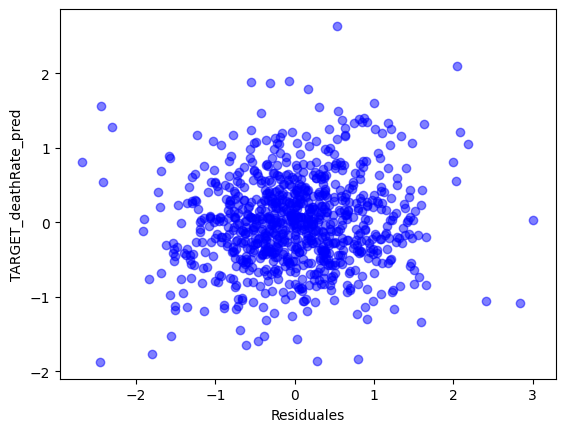

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.scatter(residuos, y_pred, color='blue', alpha=0.5)
plt.ylabel('TARGET_deathRate_pred')
plt.xlabel('Residuales')

> *Resultado:*
*Cumple con el supuesto de Homocedasticidad.*

***
> *Normalidad*
***

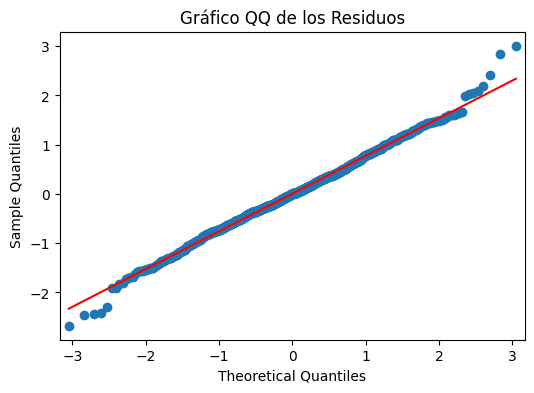

Estadístico de Shapiro-Wilk: 0.9963515996932983
Valor p de Shapiro-Wilk: 0.04118514060974121
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.
Estadístico de Kolmogorov-Smirnov: 0.08601667446317612
Valor p de Kolmogorov-Smirnov: 4.826049392063712e-06
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.


In [ ]:
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import kstest

# Crear un gráfico QQ de los residuos
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(residuos, line='s', ax=ax)
ax.set_title('Gráfico QQ de los Residuos')
plt.show()

# --------

# Realizar la prueba de Shapiro-Wilk en los residuos
stat_shapiro, p_valor_shapiro = shapiro(residuos)

# Imprimir el resultado de la prueba de Shapiro-Wilk
print("Estadístico de Shapiro-Wilk:", stat_shapiro)
print("Valor p de Shapiro-Wilk:", p_valor_shapiro)

# Interpretar el resultado
alpha = 0.05
if p_valor_shapiro > alpha:
    print("No se rechaza la hipótesis nula. Los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")

# --------

# Realizar la prueba de Kolmogorov-Smirnov en los residuos
stat_ks, p_valor_ks = kstest(residuos, 'norm')

# Imprimir el resultado de la prueba de Kolmogorov-Smirnov
print("Estadístico de Kolmogorov-Smirnov:", stat_ks)
print("Valor p de Kolmogorov-Smirnov:", p_valor_ks)

# Interpretar el resultado
alpha = 0.05
if p_valor_ks > alpha:
    print("No se rechaza la hipótesis nula. Los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")


> *Resultado:*
*Aunque a partir de la gráfica parece cumplir con el supuesto, los dos estadisticos Shapiro-Wilk y Kolmogorov-Smirnov se determina que NO cumple con el supuesto de Normalidad.*

### 10. Regresión lineal múltiple con las variables que aporten más al modelo (cinco puntos)

Haciendo uso de los elementos vistos en clase, realice pruebas sobre las variables para detectar las que puedan llegar a ser más relevantes para el modelo.<br>
Luego genere un modelo con múltiples variables, haciendo uso de las varaibles independientes que identificó como relevantes.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Separar variables independientes (X) y dependiente (y)
X = df_cancerF[['incidenceRate', 'medIncome','PctEmployed16_Over', 'povertyPercent', 'PctHS25_Over',
                'PctBachDeg25_Over','PctPublicCoverage', 'PctPublicCoverageAlone']]
y = df_cancerF['TARGET_deathRate']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo (por ejemplo, utilizando el Error Cuadrático Medio)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse.round(3))

# Calcular el R-cuadrado
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2.round(3))

Mean Squared Error (MSE): 0.511
R-squared (R^2): 0.502


#### Realice un análisis de las variables para generar un modelo de regresión lineal con las variables que aporten más al modelo

Genere un modelo de regresión lineal múltiple con las variables que identificó como relevantes.<br>
Analice los componentes del modelo y si se cumplen los <b>supuestos</b> vistos en clase.

In [ ]:
import pandas as pd
# from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_cancerF[['incidenceRate', 'medIncome','PctEmployed16_Over', 'povertyPercent', 'PctHS25_Over',
                'PctBachDeg25_Over','PctPublicCoverage', 'PctPublicCoverageAlone']]
y = df_cancerF['TARGET_deathRate']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar SelectKBest con la puntuación f-regresión y k=5 (por ejemplo)
selector = SelectKBest(f_regression, k=5)

# Aplicar SelectKBest al conjunto de entrenamiento y prueba
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Obtener las características seleccionadas
features_selected = X.columns[selector.get_support()]

# Crear y ajustar un modelo de regresión lineal con las características seleccionadas
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_selected)

# Evaluar el rendimiento del modelo (por ejemplo, utilizando el Error Cuadrático Medio)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse.round(3))

# Calcular el R-cuadrado
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2.round(3))

# Imprimir las características seleccionadas
print("Características seleccionadas:", features_selected)

Mean Squared Error (MSE): 0.527
R-squared (R^2): 0.487
Características seleccionadas: Index(['incidenceRate', 'medIncome', 'povertyPercent', 'PctBachDeg25_Over',
       'PctPublicCoverageAlone'],
      dtype='object')


***
> ***Verificación del los Supuestos***
- *Independencia*
- *Homocedasticidad*
- *Normalidad*

> *Resultado:*
*Cumple con el supuesto de Linealidad.*

***
> *Independencia*
***

In [ ]:
# Calcular los residuos
residuos = y_test - y_pred

# Realizar la prueba de Durbin-Watson en los residuos utilizando statsmodels
durbin_watson_statistic = sm.stats.durbin_watson(residuos)
print("Estadístico de Durbin-Watson:", durbin_watson_statistic)

Estadístico de Durbin-Watson: 1.880751926911891


> *Resultado:*
*Cumple con el supuesto de Independencia.*

***
> *Homocedasticidad*
***

Text(0.5, 0, 'Residuales')

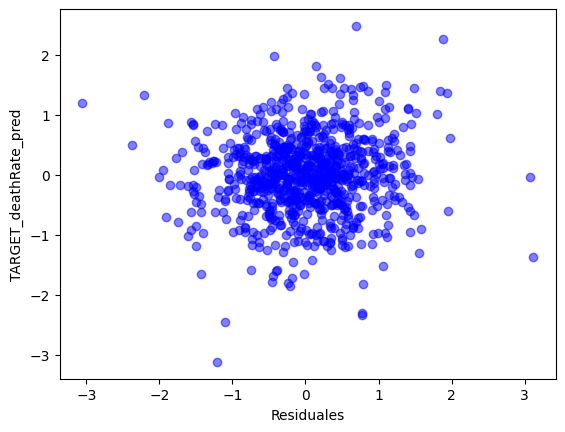

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.scatter(residuos, y_pred, color='blue', alpha=0.5)
plt.ylabel('TARGET_deathRate_pred')
plt.xlabel('Residuales')

> *Resultado:*
*Cumple con el supuesto de Homocedasticidad.*

***
> *Normalidad*
***

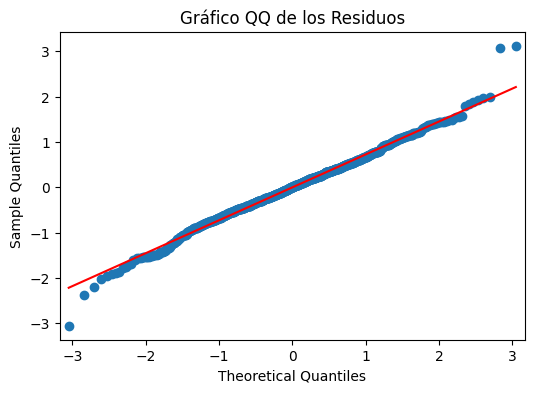

Estadístico de Shapiro-Wilk: 0.9929370880126953
Valor p de Shapiro-Wilk: 0.0003848040068987757
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.
Estadístico de Kolmogorov-Smirnov: 0.0969053059514095
Valor p de Kolmogorov-Smirnov: 1.4851136304159775e-07
Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.


In [ ]:
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import kstest

# Crear un gráfico QQ de los residuos
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(residuos, line='s', ax=ax)
ax.set_title('Gráfico QQ de los Residuos')
plt.show()

# --------

# Realizar la prueba de Shapiro-Wilk en los residuos
stat_shapiro, p_valor_shapiro = shapiro(residuos)

# Imprimir el resultado de la prueba de Shapiro-Wilk
print("Estadístico de Shapiro-Wilk:", stat_shapiro)
print("Valor p de Shapiro-Wilk:", p_valor_shapiro)

# Interpretar el resultado
alpha = 0.05
if p_valor_shapiro > alpha:
    print("No se rechaza la hipótesis nula. Los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")

# --------

# Realizar la prueba de Kolmogorov-Smirnov en los residuos
stat_ks, p_valor_ks = kstest(residuos, 'norm')

# Imprimir el resultado de la prueba de Kolmogorov-Smirnov
print("Estadístico de Kolmogorov-Smirnov:", stat_ks)
print("Valor p de Kolmogorov-Smirnov:", p_valor_ks)

# Interpretar el resultado
alpha = 0.05
if p_valor_ks > alpha:
    print("No se rechaza la hipótesis nula. Los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los residuos no siguen una distribución normal.")


> *Resultado:*
*Aunque a partir de la gráfica parece cumplir con el supuesto, los dos estadisticos Shapiro-Wilk y Kolmogorov-Smirnov se determina que NO cumple con el supuesto de Normalidad.*

#### Evalúe cual de los modelos generados es mejor se ajusta de una mejor manera a los datos. Argumente

## Análisis consolidado (diez puntos)

Realice un análisis consolidado (hasta 250 palabras) del ejercicio respondiendo:
1. Realice un resumen del ejercicio
2. ¿Cuales son las variables explicativas relevantes para predecir la tasa de mortalidad?
3. ¿Qué hallazgos son relevantes en términos de outliers?
4. ¿Qué hallazgos son relevantes sobre cumplimiento de los supuestos?

Criterios de calificación (sobre **10 puntos**):

**10 puntos**: Si presenta las conclusiones de forma clara, respondiendo las preguntas enunciadas, las sustenta con cifras y referencia los resultados previos.
**6 puntos**: Se presentan las conclusiones de forma clara respondiendo las preguntas, pero no se referencian cifras, ni análisis previos.
**3 puntos** Se presentan conclusiones, pero no se responden las preguntas.



***
> ***Resultados Finales***

*El ejercicio tuvo como objetivo tratar de predecir la incidencia de sufrir de cáncer, para llegar a este objetivo se cuenta con una base de datos que cuenta con 3024 datos con 34 variables. Estas variables están formadas por tipo objeto, entero y flotante. Con la intención de obtener diferentes modelos de regresión lineal se llevó a cabo análisis de cada una de las variables, identificación de la importancia, distribución de la base de datos en términos de valores atípicos, datos nulos, relación con la variable dependiente. Y ya con los modelos se realizó un análisis de los diferentes supuestos que puedan aplicarle.*

*Las variables que más influyen en el modelo son las siguientes ocho: 'incidenceRate', 'medIncome', 'PctEmployed16_Over', 'povertyPercent', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctPublicCoverage', 'PctPublicCoverageAlone' y empleando SelectKBest se obtuvo que las mejores cinco son: 'incidenceRate', 'medIncome', 'povertyPercent', 'PctBachDeg25_Over', 'PctPublicCoverageAlone'. Cabe señalar que al evaluar el estadístico del R-cuadrado el mejor modelo fue el obtenido con las ocho variables con 0.502, sin embargo, el modelo con cinco variables tuvo un resultado de 0.487 lo cual presenta un buen rendimiento con menos variables.*

*Para los Outliers, se empleó dos estrategias para ello, la más utilizada fue la inferencia aritmética a partir de las mismas variables que permitía no perder datos; La segunda estrategia fue la de eliminación que en sus primeros intentos trajo consigo una reducción considerable de la base de datos perjudicando el entrenamiento de los diferentes modelos, por lo que tuve que se empleada con un variable que no tuviera gran impacto.*

*Por último, el estudio de los supuestos en cada uno de los modelos permitió confirmar algunos datos que ya venían trabajando con antelación en el proyecto. Cabe señalar que la mayoría de estos supuestos se repiten entrega ciertas características tales como: El supuesto de Normalidad no se cumple en la mayoría de las veces, el supuesto de Homocedasticidad e Independencia se cumple en todos los modelos.*


## Criterios de evaluación

La calificación estarára dada por:

1. 5 puntos: Claridad en la implementación. El código se encuentra con comentarios.
2. 15 puntos: Ejecución del notebook y los análisis.
3. 10 puntos: Análisis final consolidando hallazgos.